### Exploratory Data Analysis Project - Customer Loans in Finance - Part 1

#### Intro

A project to analyse loan portfolio data for a financial institution and understand the state of the current active loans.

The goal of part 1 of the project is to gain a deeper understanding of the data and, by applying Exploratory Data Analysis (EDA) and statistical techniques on the data, uncover patterns and identifying issues and visualising the findings.  

#### Necessary Imports and Instatiate Classes

Below are the necessary packages and classes required to run the code in this notebook. The classes contain methods for analysing, transforming and visualising the data.

In [50]:
from data_transform_methods import DataTransform
from data_visualisation_methods import Plotter
from dataframe_info_methods import DataFrameInfo
from dataframe_transformation_methods import DataFrameTransform
from db_utils import download_csv
import matplotlib.pyplot as plt
import pandas as pd

# instantiate the classes
info_methods = DataFrameInfo
data_type_convert = DataTransform
df_transforms = DataFrameTransform
df_visuals = Plotter

#### Loading the Dataset as a Pandas Dataframe

Please note: the csv used for this project will first needed to be extracted from an RDS database and downloaded to your local machine. Please see GitHub README for full details.

In [51]:
loan_payments_df = pd.read_csv('loan_payments.csv')

#### Understand the data

Understand the size and shape of the data using Pandas's info and describe methods.

In [52]:
info_methods.df_info(loan_payments_df)
info_methods.describe_df(loan_payments_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

#### Data Types

Firstly, we will look at the data types for each column using the pandas info method above, converting any columns to data types as required.

##### Converting Data Types - Categorical Data

In order to determine which columns should be converted to a 'category' data type, we can check the number of unique values in each column.
From this we can see that variables such as 'term' and 'grade' have a low number unique values, and upon checking a sample of the data we see they are categorical data.



In [53]:
info_methods.num_unique(loan_payments_df)

id                             54231
member_id                      54231
loan_amount                     1083
funded_amount                   1122
funded_amount_inv               5261
term                               2
int_rate                         457
instalment                     19940
grade                              7
sub_grade                         35
employment_length                 11
home_ownership                     5
annual_inc                      6132
verification_status                3
issue_date                        61
loan_status                        9
payment_plan                       2
purpose                           14
dti                             3611
delinq_2yrs                       16
earliest_credit_line             587
inq_last_6mths                    24
mths_since_last_delinq           100
mths_since_last_record           120
open_accounts                     48
total_accounts                    88
out_prncp                      17673
o

To double check which columns should be converted to categorical data, we can look at the count of each of the values in a column to determine if any are errors present (e.g. through incorrect inputs). 

For example, there are 11 unique values in the column 'employment_length'. This column could be open to input error. By analysing the column's value counts for each unique value we can look for any values with very low counts, and also the value itself will be extraneous to the variable. In this case all values are in line with what is expected within this variable. 

Once we've analysed the distinct values of each column, we add the names of the columns we want to convert to categories into a list.

In [54]:
# Displaying the distinct values for columns with suspected categorical data types.
info_methods.count_distinct_values(loan_payments_df, 'term')
info_methods.count_distinct_values(loan_payments_df, 'employment_length')
info_methods.count_distinct_values(loan_payments_df, 'sub_grade')
info_methods.count_distinct_values(loan_payments_df, 'loan_status')
info_methods.count_distinct_values(loan_payments_df, 'purpose')

term
36 months    35845
60 months    13614
Name: count, dtype: int64
employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: count, dtype: int64
sub_grade
B3    3641
B4    3542
B2    3241
C1    3018
B5    3016
C2    2962
B1    2929
C3    2794
A5    2789
A4    2645
C4    2512
C5    2314
D1    1838
D2    1809
A3    1752
D3    1647
D4    1509
A2    1481
D5    1354
A1    1151
E1     989
E2     985
E3     817
E4     658
E5     623
F1     486
F2     390
F3     326
F4     287
F5     205
G1     156
G2     133
G3      87
G4      74
G5      71
Name: count, dtype: int64
loan_status
Fully Paid                                             27037
Current                                                19268
Charged Off                                             5571
Does not meet the credit policy. Status:Fully Paid       984
L

In [55]:
# Convert columns to a category datatype.
convert_category_columns = ['grade', 'sub_grade','employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'policy_code', 'application_type']
for c in convert_category_columns:
    data_type_convert.transform_to_category(loan_payments_df, c)

##### Converting Data Types - Datetime and Boolean

For columns containing dates, such as 'issue_date', and 'next_payment_date', we will convert these to datetime data types. As all the dates in this dataset only contain month and year information we will use the 1st of the month as the 'day' in the timestamp. 

From looking at a sample of the data we can see that the 'payment_plan' column contains a boolean value. So we shall convert this column accordingly. 

In [56]:
# convert columns to datetime datatype
convert_datetime_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
for dtc in convert_datetime_columns:
    data_type_convert.transform_to_datetime(loan_payments_df, dtc)

# convert columns to boolean datatype
data_type_convert.transform_to_boolean(loan_payments_df, 'payment_plan')


0        False
1        False
2        False
3        False
4        False
         ...  
54226    False
54227    False
54228    False
54229    False
54230    False
Name: payment_plan, Length: 54231, dtype: bool

##### Converting Data Types - Numeric

The 'term' column contains just two unique values. '24 months' and '36 months'. We will use this column to calculate remaining total outstanding loan amounts. So let's remove the 'months' and convert to a numerioc data type.

In [57]:
loan_payments_df['term'] = loan_payments_df['term'].str.replace(' months', '')
data_type_convert.transform_to_numeric(loan_payments_df, 'term')

# Print the df info to check the datatypes after conversion.
info_methods.df_info(loan_payments_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

#### Nulls

Check the percentage of nulls in each column and visualise the nulls using the missingno package.

id                             0.000000
member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.087994
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025
open_accounts                  0.000000


<Axes: >

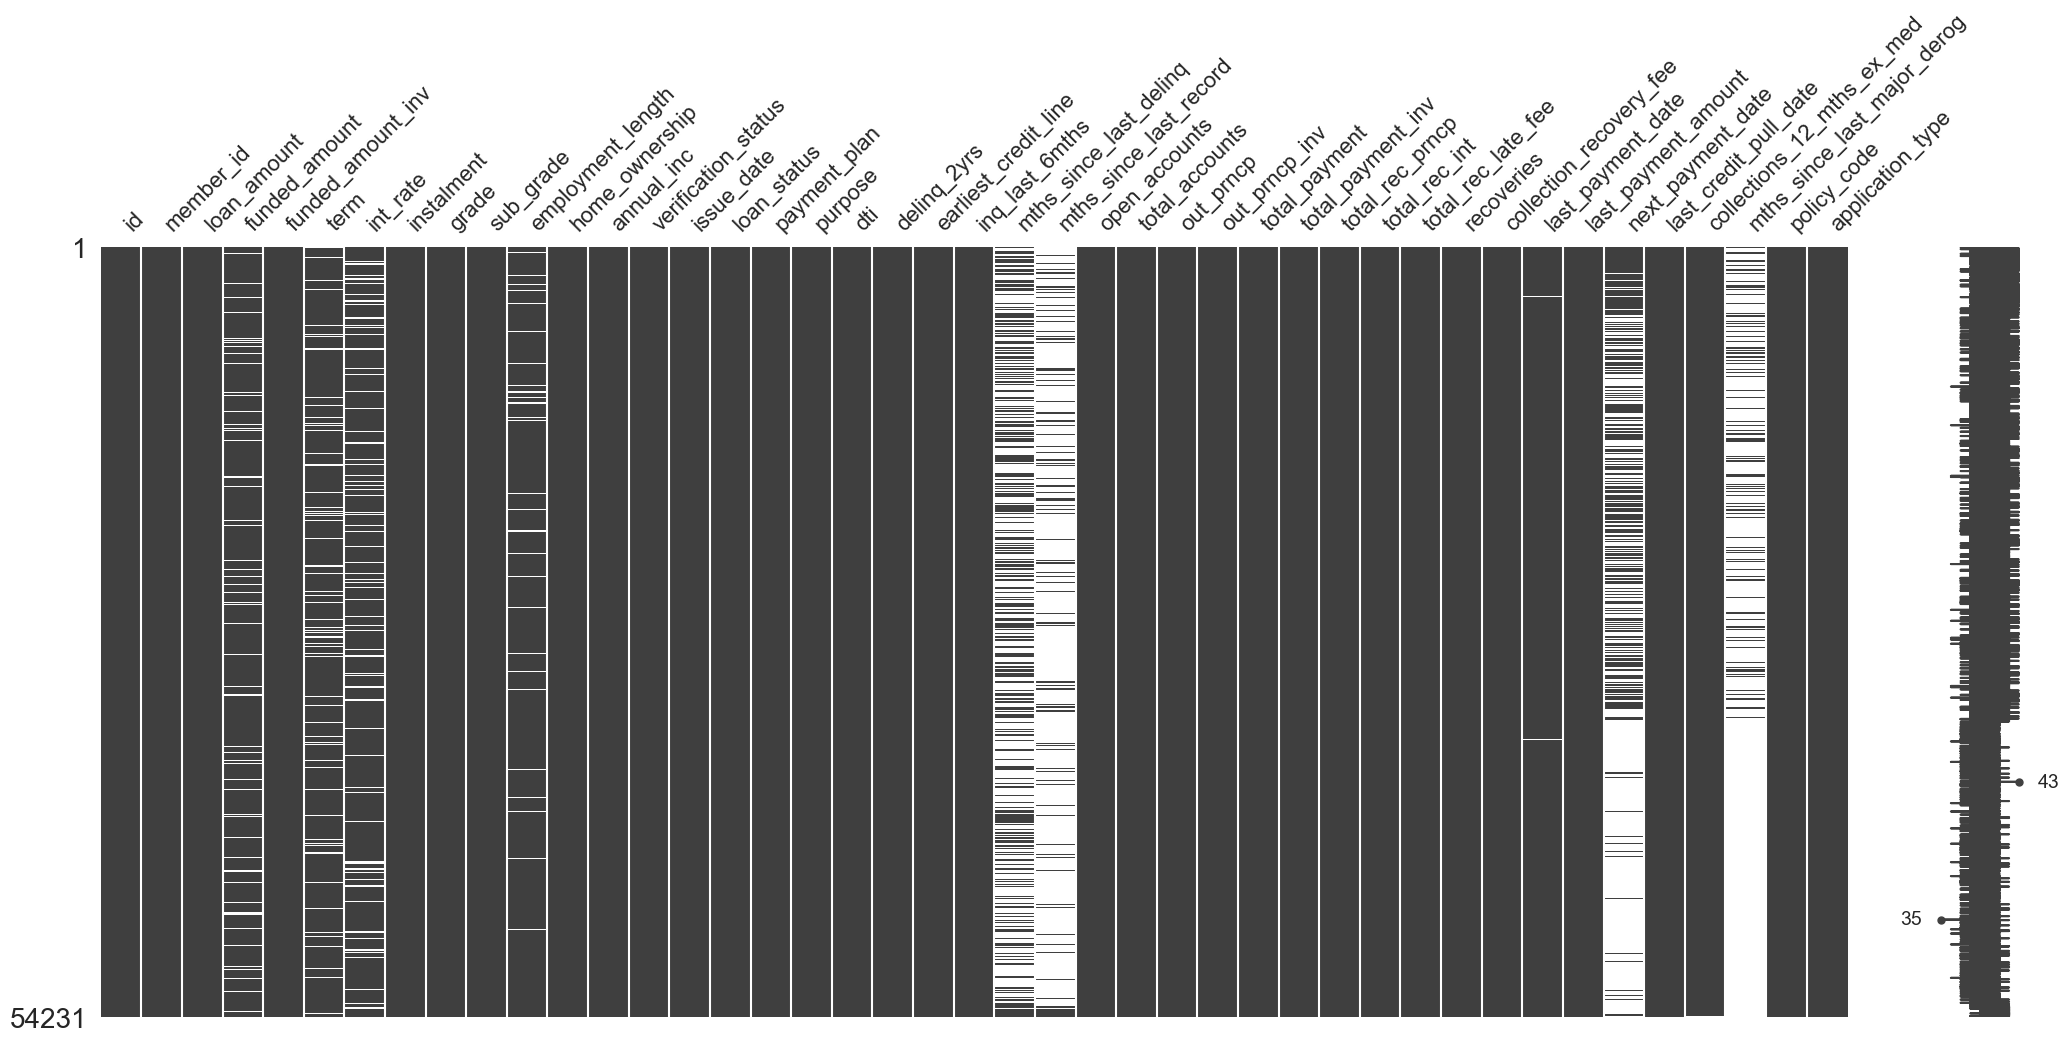

In [58]:
info_methods.count_nulls(loan_payments_df)

df_visuals.missing_values_matrix(loan_payments_df)

Observations from the above informations:

- Four columns have exceptionally high % null values:
    'mths_since_last_delinq' 
    'mths_since_last_record'
    'next_payment_date'
    'mths_since_last_major_derog'

- Three of these columns are datetime variables related to a borrower's credit check history. They are:
    1. 'mths_since_last_delinq' = number of months since their last deliqunecy (failing to make an on-time payment on a loan)
    2. 'mths_since_last_record' = number of months since their last public record (e.g. bankrupcy or insolveny that has to be officially made public)
    3. 'mths_since_last_major_derog' = number of months since last derogatory information was reported in a credit check (e.g. a late payment)

While these data points might be useful for determining a future borrowers abiltiy to payback a loan, they are not relevant to the main goal of this project which is to understand the state of the companies current loans and, given the high number of null values, I therefore conclude that these three variables can be dropped. 

The 4th column with a high % null values is 'next_payment_date'. This sounds like it could be important. However, again, if our goal is to understand the risk to current loans, we can use the 'loan_status' columns to determine which loans are currently active (as we would assume that only active loans have values in the next_payment_date column), and my assumption is that this column is not giving us any useful information therefore we can also drop it.

In [59]:
# Drop 4 columns and create a new version of the dataframe.
drop_these_columns = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'next_payment_date']
loan_payments_df_nulls_removed = df_transforms.drop_columns(loan_payments_df, drop_these_columns)

Moving from left to right on the missingno null visualisation, the 'funded_amount' column data looks very similar to the 'loan_amount' but with some values missing. 
By checking their correlation on the below heatmap we can see that they are highly correalted and the only difference appears to be the null values in the 'funded_amount' column. So we can drop that column entirely.

We will look at correlation between all the variables later in the project. 

<Axes: >

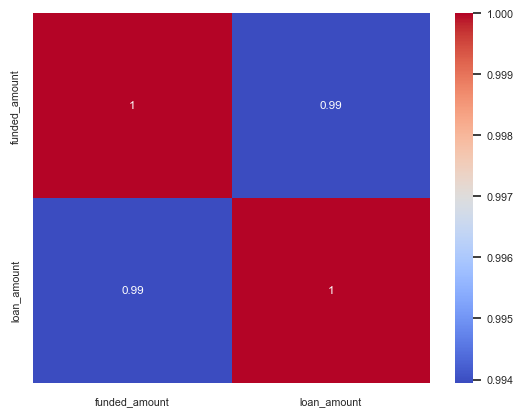

In [60]:
df_visuals.heatmap(loan_payments_df_nulls_removed, 'funded_amount', 'loan_amount')

In [61]:
# Dropping the 'funded_amount' column from the dataset. 
df_transforms.drop_columns(loan_payments_df_nulls_removed, 'funded_amount')

id  member_id  loan_amount  funded_amount_inv  term  int_rate  \
0      38676116   41461848         8000             8000.0  36.0      7.49   
1      38656203   41440010        13200            13200.0  36.0      6.99   
2      38656154   41439961        16000            16000.0  36.0      7.49   
3      38656128   41439934        15000            15000.0  36.0     14.31   
4      38656121   41439927        15000            15000.0  36.0      6.03   
...         ...        ...          ...                ...   ...       ...   
54226     76597      76583         5000             1775.0  36.0      9.01   
54227    142608      74724         5000             2350.0  36.0     10.59   
54228    117045      70978         3500             2225.0  36.0      7.43   
54229     88854      70699         5000              225.0  36.0      7.43   
54230     72323      70694         5000              350.0  36.0     11.54   

       instalment grade sub_grade employment_length  ... total_rec_int  \
0          248.82     A        A4           5 years  ...        512.21   
1          407.52     A        A3           9 years  ...        787.94   
2          497.63     A        A4           8 years  ...        824.54   
3          514.93     C        C4            1 year  ...        947.47   
4          456.54     A        A1         10+ years  ...        770.93   
...           ...   ...       ...               ...  ...           ...   
54226      159.03     B        B2            1 year  ...        724.82   
54227      162.73     C        C2          < 1 year  ...        826.31   
54228      108.77     A        A2         10+ years  ...        415.37   
54229      155.38     A        A2           4 years  ...        174.18   
54230      164.98     C        C5           9 years  ...        352.34   

       total_rec_late_fee recoveries collection_recovery_fee  \
0                0.000000       0.00                    0.00   
1                0.000000       0.00                    0.00   
2                0.000000       0.00                    0.00   
3                0.000000       0.00                    0.00   
4                0.000000       0.00                    0.00   
...                   ...        ...                     ...   
54226            0.000000       0.00                    0.00   
54227          104.942381       0.00                    0.00   
54228            0.000000       0.00                    0.00   
54229            0.000000       0.00                    0.00   
54230            0.000000     182.27                    1.84   

      last_payment_date  last_payment_amount last_credit_pull_date  \
0            2022-01-01               248.82            2022-01-01   
1            2022-01-01               407.52            2022-01-01   
2            2021-10-01             12850.16            2021-10-01   
3            2021-06-01             13899.67            2021-06-01   
4            2022-01-01               456.54            2022-01-01   
...                 ...                  ...                   ...   
54226        2016-07-01               160.61            2016-07-01   
54227        2016-10-01               490.01            2016-09-01   
54228        2016-09-01               110.58            2013-05-01   
54229        2014-03-01                 0.00            2013-05-01   
54230        2014-03-01               164.97            2015-01-01   

       collections_12_mths_ex_med  policy_code application_type  
0                             0.0            1       INDIVIDUAL  
1                             0.0            1       INDIVIDUAL  
2                             0.0            1       INDIVIDUAL  
3                             0.0            1       INDIVIDUAL  
4                             0.0            1       INDIVIDUAL  
...                           ...          ...              ...  
54226                         NaN            1       INDIVIDUAL  
54227                         0.0            1   

Most of the nulls in the 'term' column we can calculate from the 'loan_amount', 'instalment' and 'int_rate' columns.
As the 'term' is a categorical data type, it is best to impute any remaining nulls with the mode, which is 36 months in this case. 

In [62]:
# Calculate the loan term for nulls in a new temporary column called 'calc_term'.
loan_payments_df_nulls_removed['calc_term'] = (loan_payments_df_nulls_removed.apply
                                               (lambda row: df_transforms.calculate_loan_term
                                               (row['loan_amount'], row['int_rate'], row['instalment']), axis=1))
# Apply the calculated loan term to the original 'term' column.
loan_payments_df_nulls_removed['term'] = (loan_payments_df_nulls_removed['term'].fillna
                                          (loan_payments_df_nulls_removed['calc_term']))

# Apply the mode to any remaing nulls in the 'term' column.
loan_payments_df_nulls_removed['term'] = (loan_payments_df_nulls_removed['term'].fillna
                                          (loan_payments_df_nulls_removed['term'].mode()[0]))

# Drop the 'calc_term' column to tidy up the dataset.
loan_payments_df_nulls_removed = df_transforms.drop_columns(loan_payments_df_nulls_removed, 'calc_term')

For the 'int_rate' column, the below density plot shows a continuous variable, so it is safe to assume Missing Completely At Random (MCAR) for the nulls, so I have opted to use the mean to impute the null values.

The mean of the distribution is 13.51


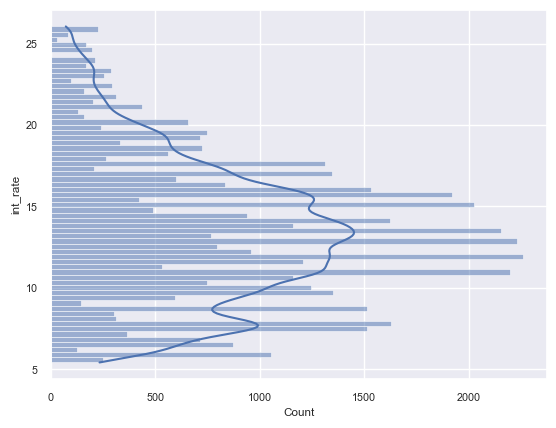

In [63]:
# Density plot for the 'int_rate' column and calculating the mean. 
df_visuals.density_plot(loan_payments_df_nulls_removed, 'int_rate')
print(
    f"The mean of the distribution is {info_methods.column_mean(
    loan_payments_df_nulls_removed, 'int_rate').round(2)}")

In [64]:
# Imputing the mean for the nulls in the 'int_rate' column.
loan_payments_df_nulls_removed['int_rate'] = (loan_payments_df_nulls_removed['int_rate'].fillna
                                              (loan_payments_df_nulls_removed['int_rate'].mean()))

For the 'employment_length' column, as the data is nominal categorical data, we should use the mode to impute the nulls here. 

In [65]:
loan_payments_df_nulls_removed['employment_length'] = (loan_payments_df_nulls_removed['employment_length'].fillna
                                                       (loan_payments_df_nulls_removed['employment_length'].mode()[0]))

Finaly, 'last_payment_date', 'last_credit_pull_date' and 'collections_12_mths_ex_med' all have <2% nulls. So dropping the full rows with nulls in these columns is the simplest method with the list impact on the whole dataset. 

In [66]:
# Dropping rows with a small number of null values.
drop_these_rows = ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']
for r in drop_these_rows:
    df_transforms.drop_null_rows(loan_payments_df_nulls_removed, r)


Re-run the dataframe info method and missingno visualisation to check all the nulls have been removed correctly.

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  int64         
 1   member_id                   54100 non-null  int64         
 2   loan_amount                 54100 non-null  int64         
 3   funded_amount_inv           54100 non-null  float64       
 4   term                        54100 non-null  float64       
 5   int_rate                    54100 non-null  float64       
 6   instalment                  54100 non-null  float64       
 7   grade                       54100 non-null  category      
 8   sub_grade                   54100 non-null  category      
 9   employment_length           54100 non-null  category      
 10  home_ownership              54100 non-null  category      
 11  annual_inc                  54100 non-null  float64       


<Axes: >

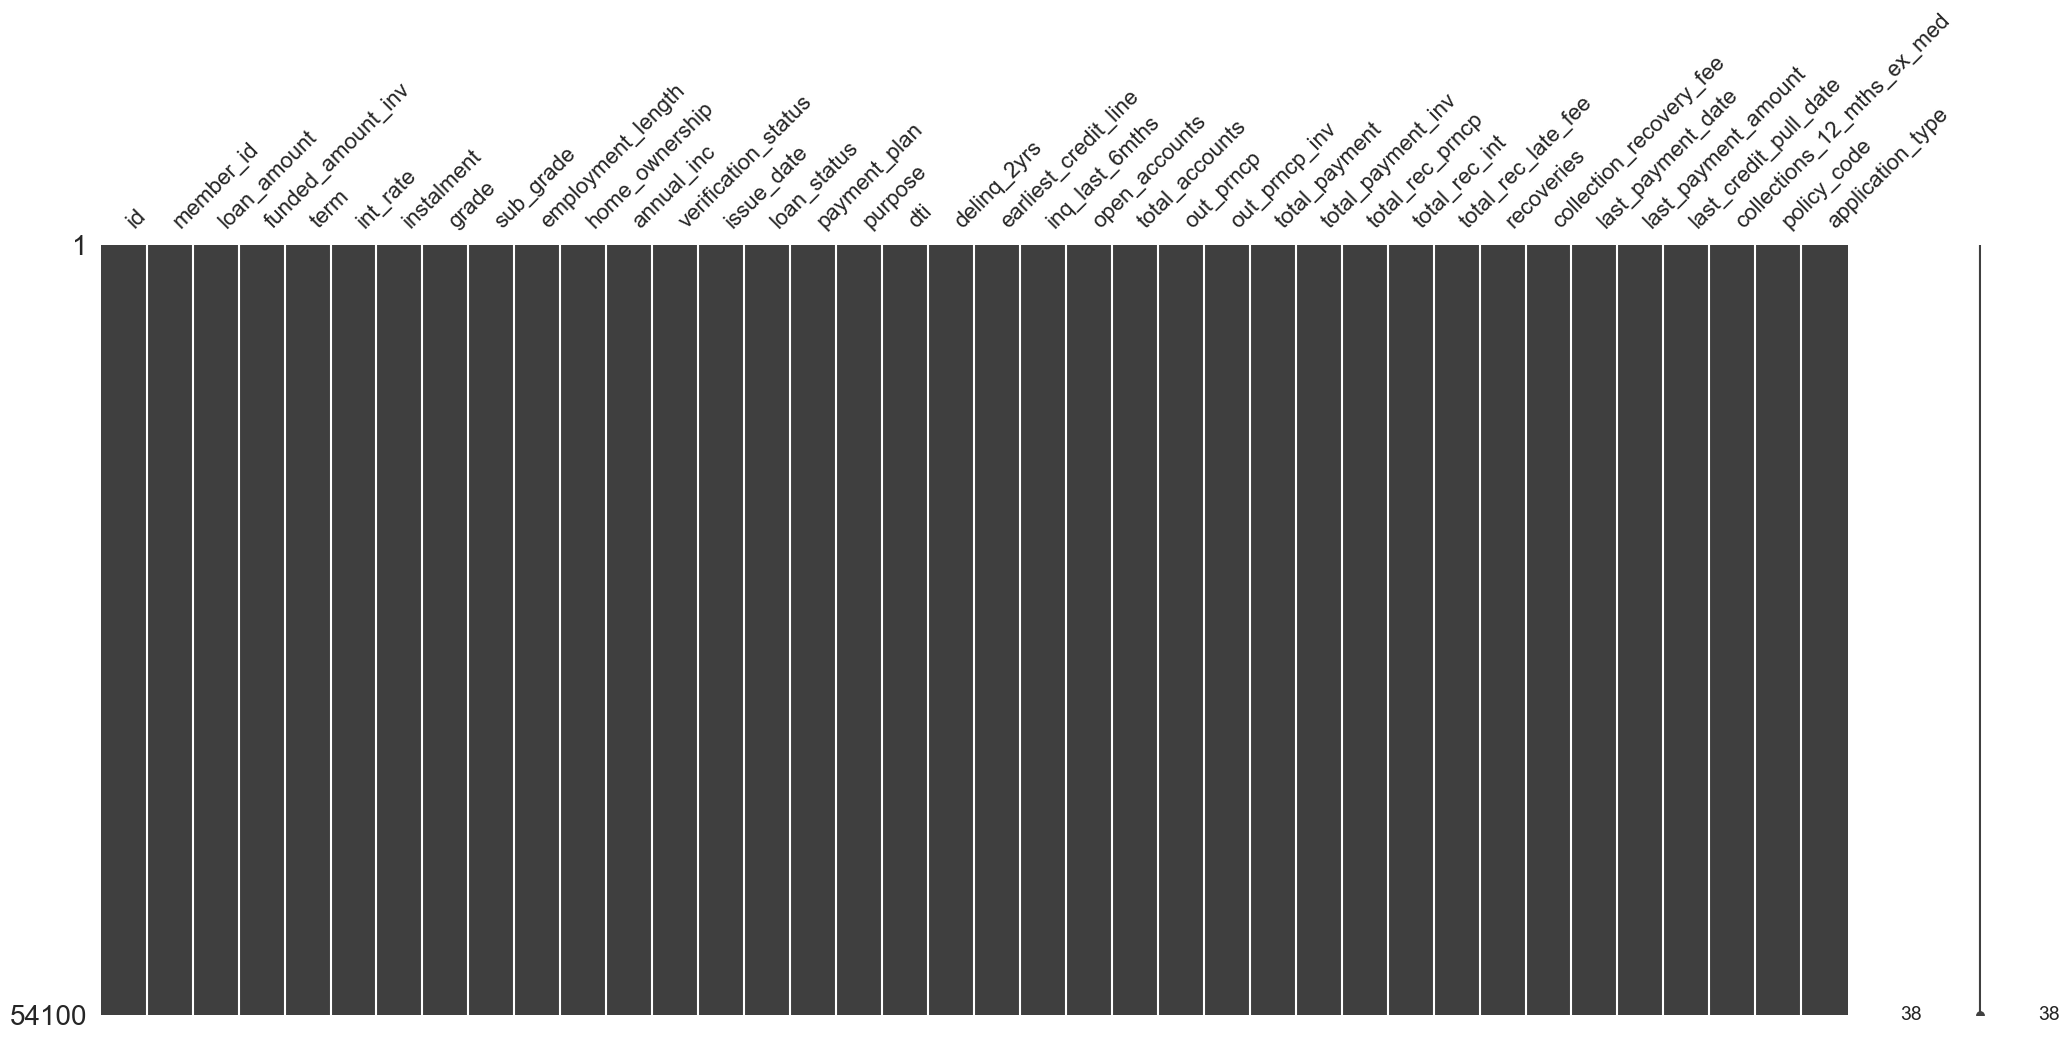

In [67]:
info_methods.df_info(loan_payments_df_nulls_removed)  
df_visuals.missing_values_matrix(loan_payments_df_nulls_removed)  

#### Download dataframe for later analysis

At this stage of the EDA, following the removal of the nulls, we need to download the dataframe as a csv so we can use it for the data analysis part of the project.

In [68]:
df_download = download_csv(loan_payments_df_nulls_removed, 'loan_payments_nulls_removed.csv')

#### Skewed Data
Check the skew for each column using Pandas built in skew method.

In [69]:
info_methods.df_skew(loan_payments_df_nulls_removed)

id                              2.369415
member_id                       2.204549
loan_amount                     0.804312
funded_amount_inv               0.814251
term                            1.967559
int_rate                        0.432728
instalment                      0.996150
annual_inc                      8.735737
payment_plan                  232.594067
dti                             0.189020
delinq_2yrs                     5.318818
inq_last_6mths                  3.243836
open_accounts                   1.059493
total_accounts                  0.780083
out_prncp                       2.352526
out_prncp_inv                   2.352946
total_payment                   1.269266
total_payment_inv               1.258474
total_rec_prncp                 1.262007
total_rec_int                   2.203625
total_rec_late_fee             13.258472
recoveries                     14.382675
collection_recovery_fee        27.794716
last_payment_amount             2.496079
collections_12_m

All columns are positively skewed.
Lets look more closely at those variables with a skew above 0.5 on a histogram. 
Bearing in mind that variables like id, and member_id are nominal data so will not be consdisered here, as well as boolean columns like payment_plan.

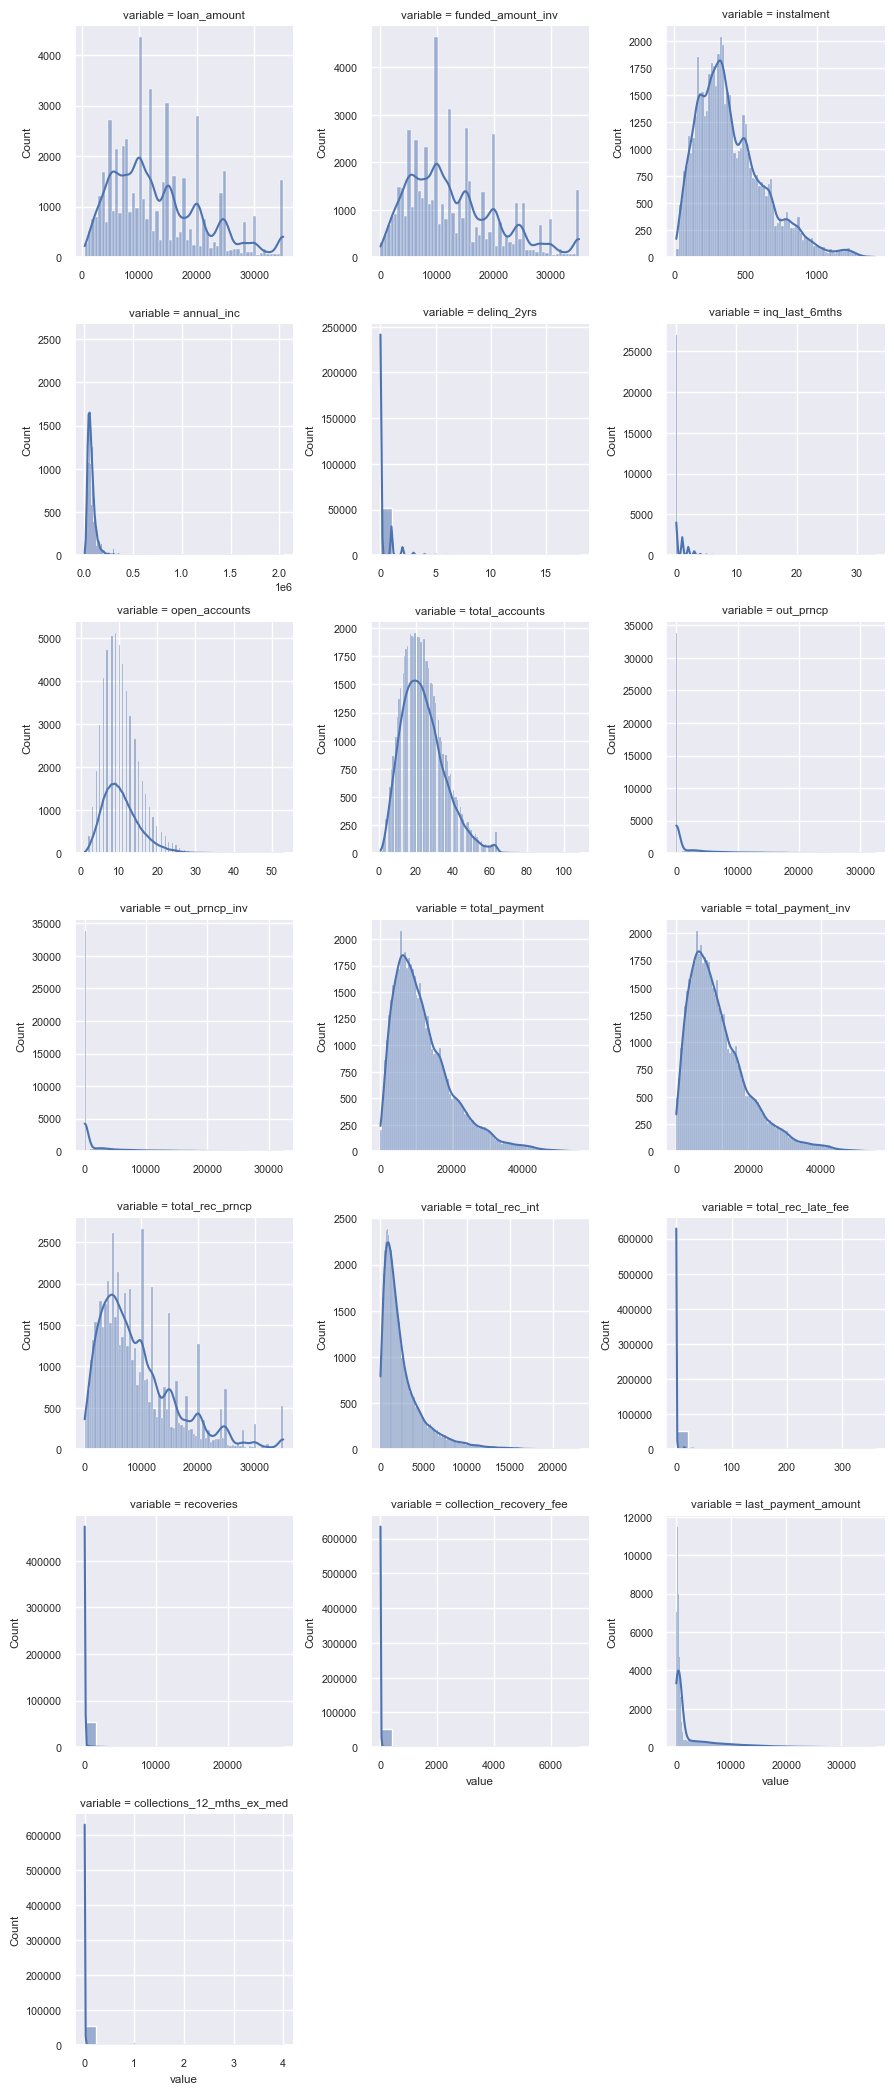

In [70]:
skewed_data = [
    "loan_amount",
    "funded_amount_inv",
    "instalment",
    "annual_inc",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_accounts",
    "total_accounts",
    "out_prncp",
    "out_prncp_inv",
    "total_payment",
    "total_payment_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_payment_amount",
    "collections_12_mths_ex_med"
]

df_visuals.histogram_kde(loan_payments_df_nulls_removed, skewed_data)

Observations from the above histogram:

- Several variables have a very large number of zero values skewing the data. As the assumption is that these zero values are integrel to the dataset, we should refrain for adjusting their skew or their zero outliers in order to avoid distrupting the dateset too much.

- 'annual_inc' column looks skewed by some large outliers.  

- At first inspection, these three pairs of variables look highly correlated: 
    1. loan_amount and funded_amount_inv
    2. total_payment and total_payment_inv
    3. out_prncp and out_prncp_inv.

For now, we will choose one from each pair to keep and perform the skew transform on, and analyse the correlation in more detail at a later stage of the project.

Following these observations we will take a close look at the columns in the below 'skewed_data' list, and perform data transformations if necessary:

In [71]:
skewed_data = [
    "loan_amount",
    "instalment",
    "annual_inc",
    "open_accounts",
    "total_accounts",
    "total_payment",
    "total_rec_prncp",
    "total_rec_int",
]

Let's check the descriptive statistics for each of those columns, as well as the histograms and Q-Q plots.

The Skew of the loan_amount is: 
0.8043121863503576
count    54100.000000
mean     13344.744917
std       8081.004483
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18075.000000
max      35000.000000
Name: loan_amount, dtype: float64


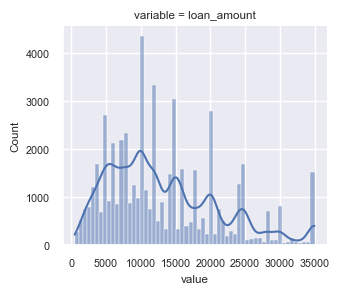

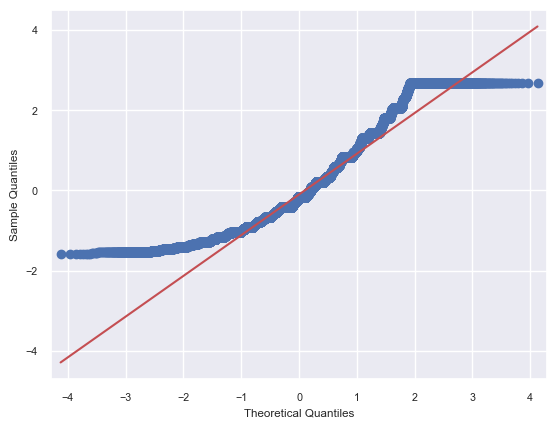

The Skew of the instalment is: 
0.9961503404396858
count    54100.000000
mean       400.331111
std        238.886267
min         15.670000
25%        224.660000
50%        347.160000
75%        528.000000
max       1407.010000
Name: instalment, dtype: float64


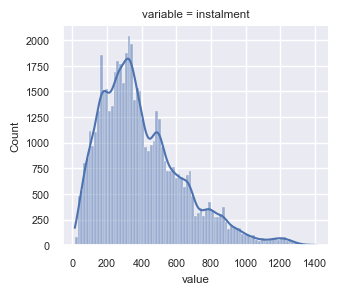

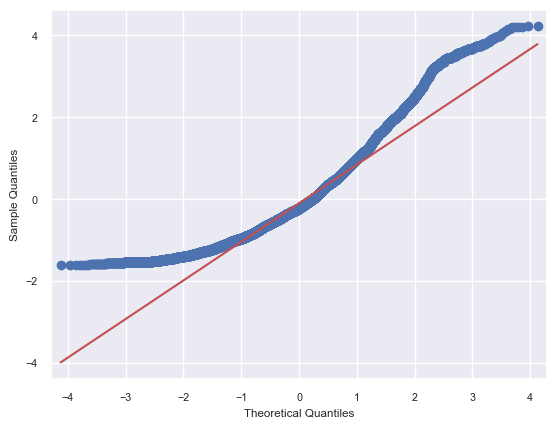

The Skew of the annual_inc is: 
8.73573692583551
count    5.410000e+04
mean     7.222286e+04
std      5.155488e+04
min      3.300000e+03
25%      4.500000e+04
50%      6.105250e+04
75%      8.600000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64


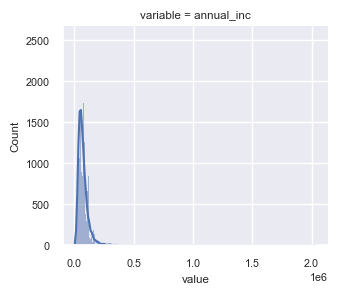

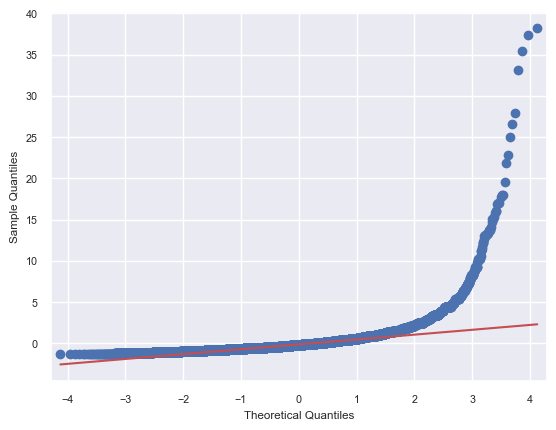

The Skew of the open_accounts is: 
1.0594931166880517
count    54100.000000
mean        10.565490
std          4.796082
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         53.000000
Name: open_accounts, dtype: float64


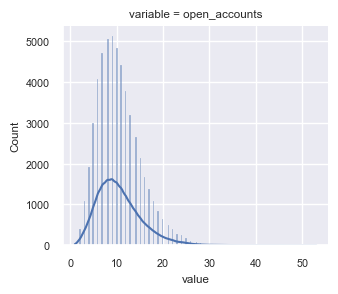

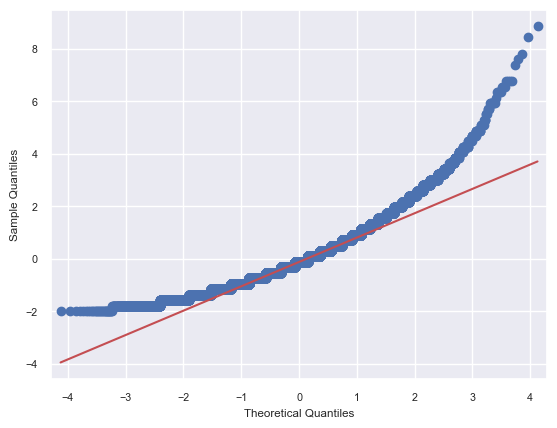

The Skew of the total_accounts is: 
0.7800832932375489
count    54100.000000
mean        24.181479
std         11.580363
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max        108.000000
Name: total_accounts, dtype: float64


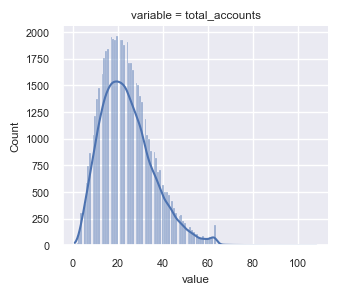

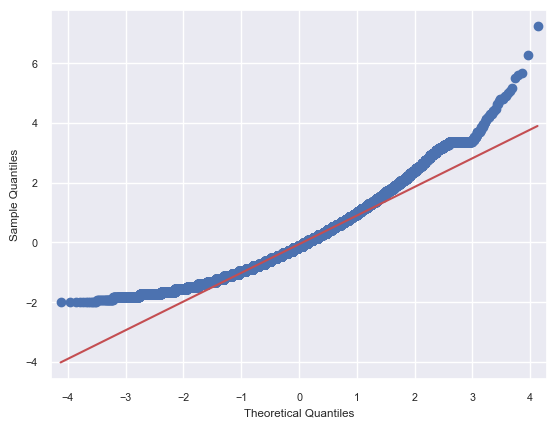

The Skew of the total_payment is: 
1.2692662197762663
count    54100.000000
mean     12099.322396
std       8387.825058
min         33.730000
25%       5916.007390
50%      10130.703339
75%      16289.777500
max      55758.222084
Name: total_payment, dtype: float64


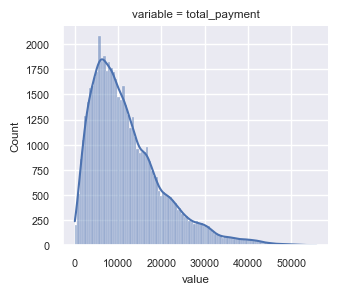

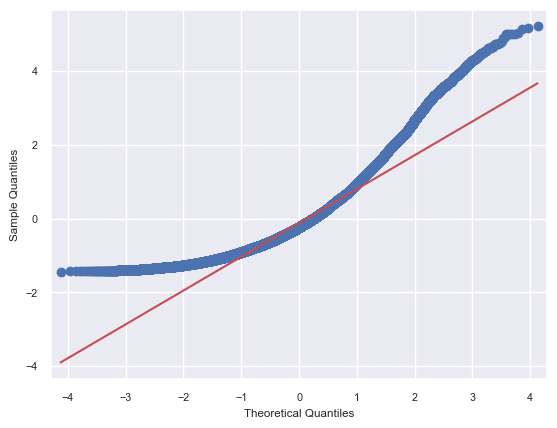

The Skew of the total_rec_prncp is: 
1.262007269838639
count    54100.000000
mean      9423.503581
std       6955.881319
min          0.000000
25%       4281.775000
50%       7672.150000
75%      12549.777500
max      35000.020000
Name: total_rec_prncp, dtype: float64


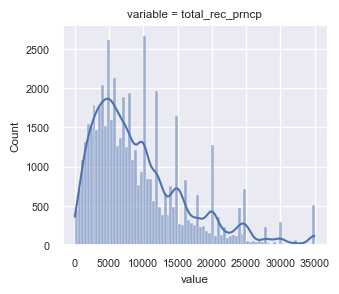

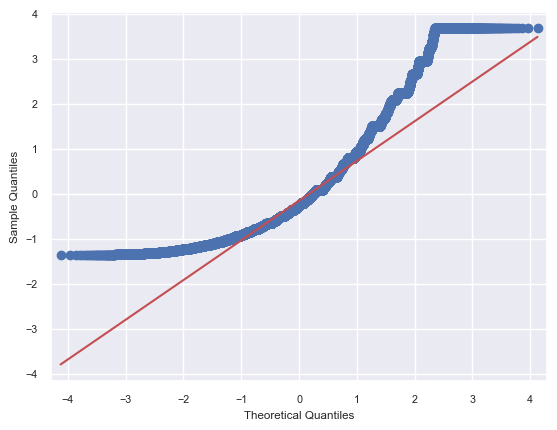

The Skew of the total_rec_int is: 
2.203625284669197
count    54100.000000
mean      2582.719067
std       2582.415330
min          6.220000
25%        892.677500
50%       1739.230000
75%       3327.552500
max      23062.450000
Name: total_rec_int, dtype: float64


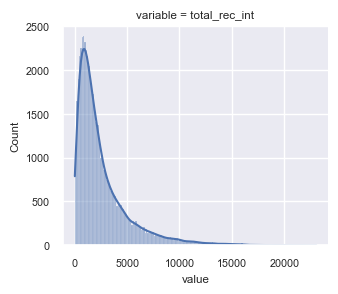

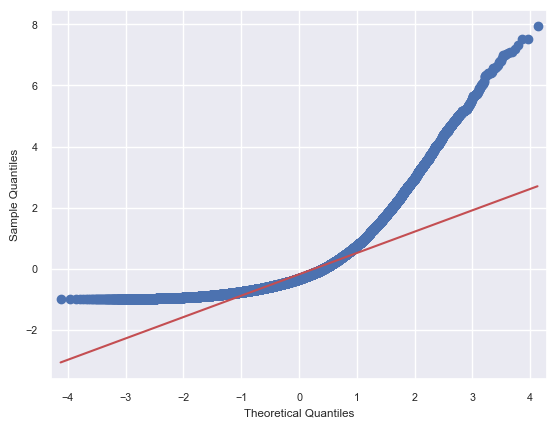

In [72]:
for column in skewed_data:
    print(f"The Skew of the {column} is: ")
    info_methods.col_skew(loan_payments_df_nulls_removed, column)
    info_methods.describe_col(loan_payments_df_nulls_removed, column)
    df_visuals.histogram_kde(loan_payments_df_nulls_removed, column)
    df_visuals.qq_plot(loan_payments_df_nulls_removed, column)


Checking the descriptive statistics for each of those columns to visualise the central tendency, dispersion and shape of the distribution, we can observe:
1. 'annual_inc', 'total_accounts' and 'open_accounts' have some large outliers skewing the data. We should drop those at a later stage.
2. There are a large number of 'loan_amounts' that are at a maximum of 35,000. I assume this is an upper limit of loan amount set by the company. This is a crucial variable for this dataset, so I don't want to transform if it I have to, so let's leave those outliers in for now, but we can remove them later if we think it will affect the results of our statistical calculations later. 
3. 'total_rec_prncp' has zero values (as some borrowers have already paid off their loans), so we would need to use the Yeo-Johnson Transform to correct their skew. 

Conclusion: the majorioty of the variables have some skew, with 1.0 skew being the benchmark for this dataset I would apply, and any variables with skew between 0.5 - 1.0 contain large outliers that if we drop at a later stage will reduce their skew. For those variables with skew over 1.0 we will transform the data.

These are the variables we will transform the skew for:
    'annual_inc',
    'open_accounts',
    'total_payment',
    'total_rec_int'
    'toal_rec_prncp'

Let's visualise what a log transform will look like to improve the skew for those 5 variables in turn:

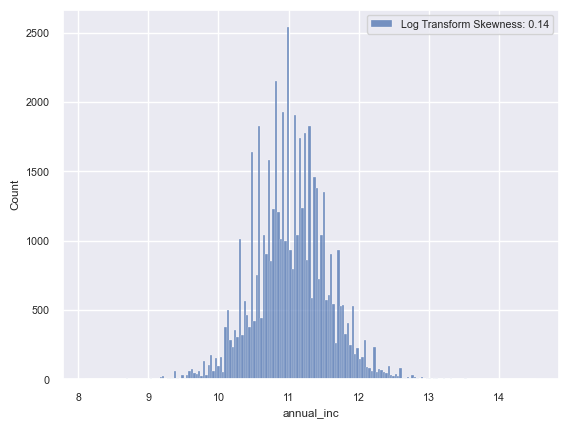

In [73]:
df_visuals.log_transform_plot(loan_payments_df_nulls_removed, 'annual_inc')

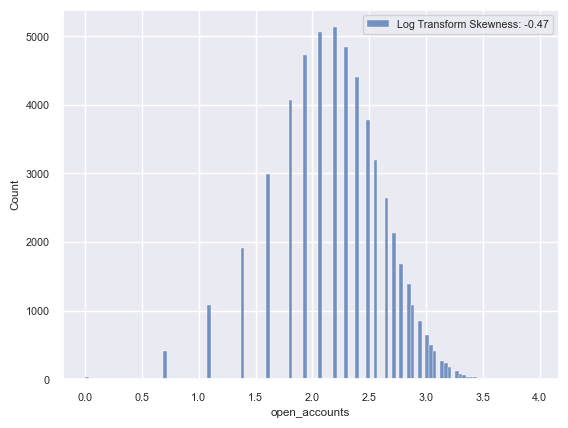

In [74]:
df_visuals.log_transform_plot(loan_payments_df_nulls_removed, 'open_accounts')

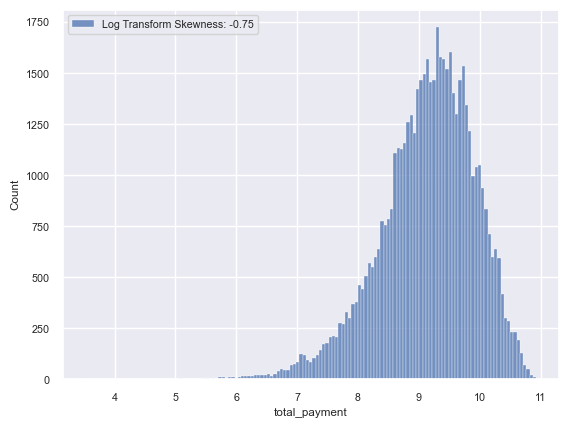

In [75]:
df_visuals.log_transform_plot(loan_payments_df_nulls_removed, 'total_payment')


The log_transform is showing 'total_payment' with a left skew curve. Let's visualise the Box-Cox transform for 'total_payment' instead to see if it will improve it's skewness better than -0.75.

The Box-Cox Transform for total_payment:


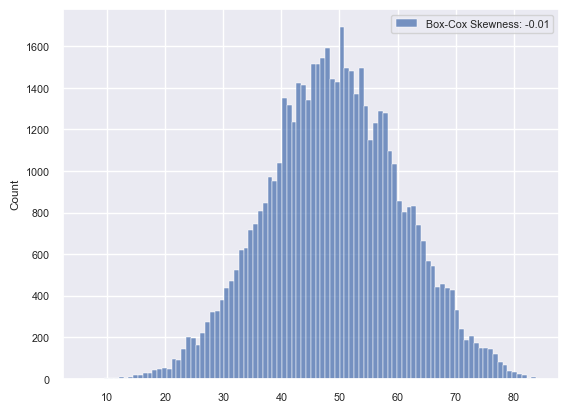

In [76]:
print("The Box-Cox Transform for total_payment:")
df_visuals.boxcox_transform_plot(loan_payments_df_nulls_removed, 'total_payment')

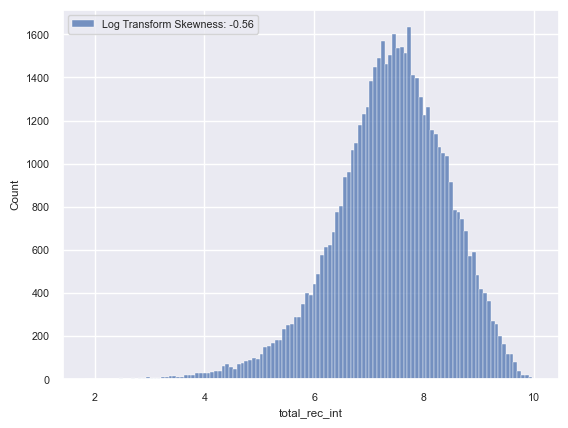

In [77]:
df_visuals.log_transform_plot(loan_payments_df_nulls_removed, 'total_rec_int')

As 'total_rec_prncp' contains some zero values we'll use the Yeo Johnson transform to tackle its skewness:

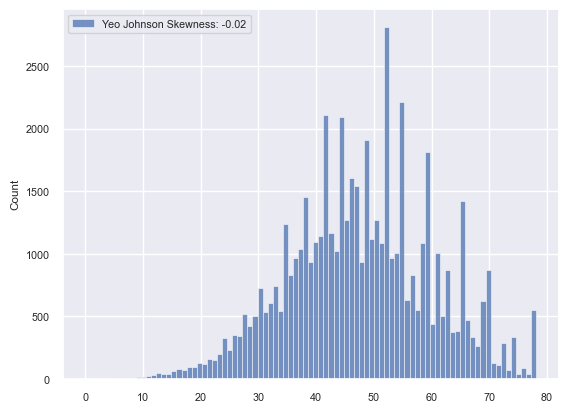

In [78]:
df_visuals.yeo_johnson_plot(loan_payments_df_nulls_removed, 'total_rec_prncp')

We'll transform those variables as shown above and then re-check their histograms and Q-Q plots:

In [79]:
variables_to_log_transform = [    
    'annual_inc',
    'open_accounts',
    'total_rec_int'
]

# Transform variables with log transform.
for column in variables_to_log_transform:
    loan_payments_df_skew_corrected = df_transforms.log_transform(loan_payments_df_nulls_removed, column)

# Transform variable with Box-Cox transform.
loan_payments_df_skew_corrected = df_transforms.box_cox_transform(loan_payments_df_skew_corrected, 'total_payment')   

# Transfrorm variable with Yeo Johnson transform.
loan_payments_df_skew_corrected = df_transforms.yeo_johnson_transform(loan_payments_df_skew_corrected, 'total_rec_prncp')  

The Skew of the annual_inc is: 
0.14181830888070776
count    54100.000000
mean        11.038375
std          0.530240
min          8.101678
25%         10.714418
50%         11.019489
75%         11.362103
max         14.528354
Name: annual_inc, dtype: float64


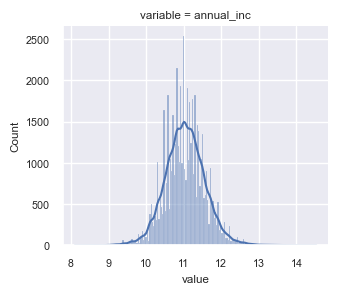

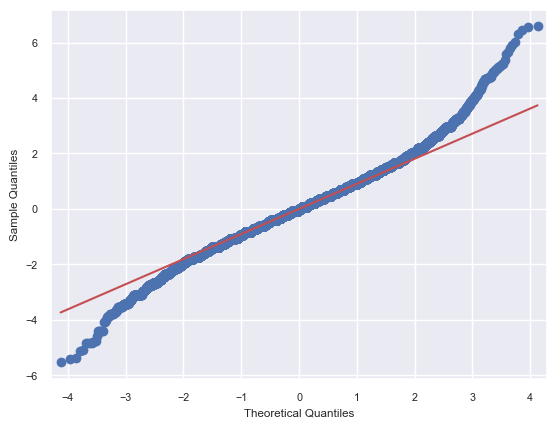

The Skew of the open_accounts is: 
-0.4688202095568502
count    54100.000000
mean         2.253107
std          0.472503
min          0.000000
25%          1.945910
50%          2.302585
75%          2.564949
max          3.970292
Name: open_accounts, dtype: float64


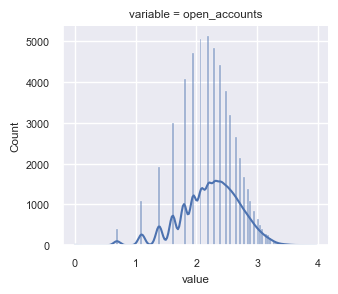

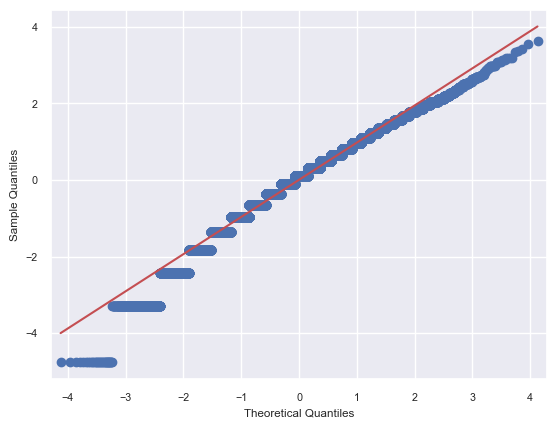

The Skew of the total_rec_int is: 
-0.5635890511324506
count    54100.000000
mean         7.399947
std          1.033755
min          1.827770
25%          6.794225
50%          7.461198
75%          8.109992
max         10.045961
Name: total_rec_int, dtype: float64


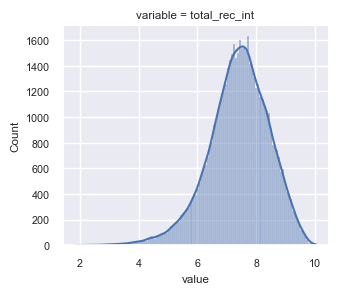

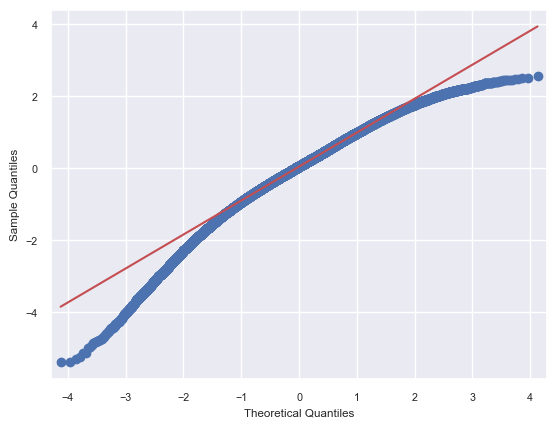

The Skew of the total_payment is: 
-0.013817887291816109
count    54100.000000
mean        49.166758
std         11.495813
min          6.221101
25%         41.334824
50%         49.108666
75%         57.089793
max         83.879238
Name: total_payment, dtype: float64


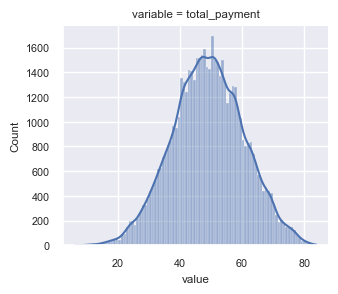

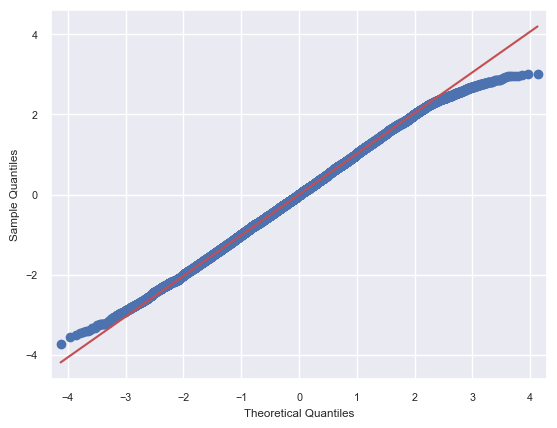

The Skew of the total_rec_prncp is: 
-0.017688735889561755
count    54100.000000
mean        47.870500
std         12.493827
min          0.000000
25%         39.369534
50%         47.748658
75%         56.088299
max         78.114289
Name: total_rec_prncp, dtype: float64


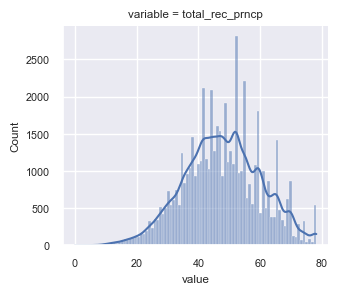

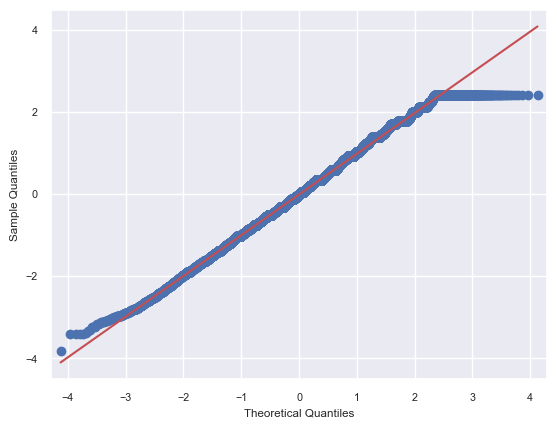

In [80]:
variables_transformed = [
    'annual_inc',
    'open_accounts',
    'total_rec_int',
    'total_payment',
    'total_rec_prncp'
]

# Checking the transformed variables' histograms and Q-Q plots.
for column in variables_transformed:
    print(f"The Skew of the {column} is: ")
    info_methods.col_skew(loan_payments_df_skew_corrected, column)
    info_methods.describe_col(loan_payments_df_skew_corrected, column)
    df_visuals.histogram_kde(loan_payments_df_skew_corrected, column)
    df_visuals.qq_plot(loan_payments_df_skew_corrected, column)

#### Outliers

Let's check the remaining columns for outliers by checking the IQR (interquartile range) and using scatter and box plots to visualise any outliers. 

Following our previous exploration of the data, including any columns we know already are highly correlated from the histograms, or have a large number of zeros in the dataset as previously spotted, this is the resulting list of columns containing continuous data and potential outliers to analyse further:
    'loan_amount'
    'instalment'
    'annual_inc'
    'open_accounts'
    'total_accounts'
    'total_payment'
    'total_rec_prncp'
    'total_rec_int'

Note: some of the outliers would have been removed when we carried out a data transform on some of the heavily skewed columns but we should still check these columns for any remaining outliers.

Analysing each columns in turn by calculating its IQR and then the upper and lower bounds. Any values above and below these values are generally considered outliers. However for each variable we will consider its unique distribution and relevance to the overall dataset, especially the effect of removing multiple rows on the full dataset, therefore we will need to employ custom functions when removing outliers for each variable.

Firstly 'loan_amount'
 

IQR and Outliers for: loan_amount
Q1 (25th percentile): 7000.0
Q3 (75th percentile): 18075.0
IQR: 11075.0


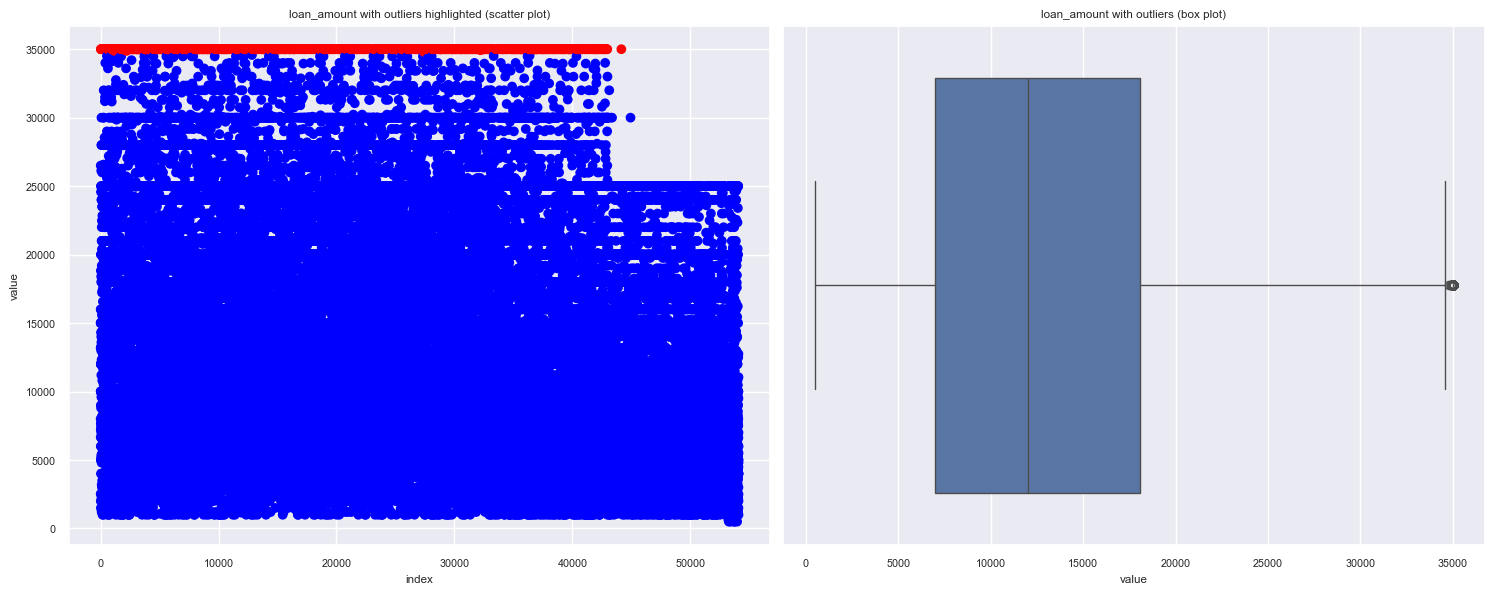

In [81]:
column = 'loan_amount'
print(f'IQR and Outliers for: {column}')
# Measure the IQR.
outliers = info_methods.measure_iqr(loan_payments_df_skew_corrected, column)
# Visualising the data on scatter and box plots.
df_visuals.outliers_visuals(loan_payments_df_skew_corrected, column, outliers)
plt.show()

Observations: as mentioned above, 35000 is the maximum value in the column and occurs across a large number of loans, the assumption is that 35000 is the maximum loan amount available. There are also no low outliers in this variable. Therefore as the 'loan_amount' is a key datapoint in this project and the maximum value is a consistent 35000, we should not remove any outliers for this variable.

'instalment'

IQR and Outliers for: instalment
Q1 (25th percentile): 224.66
Q3 (75th percentile): 528.0
IQR: 303.34000000000003


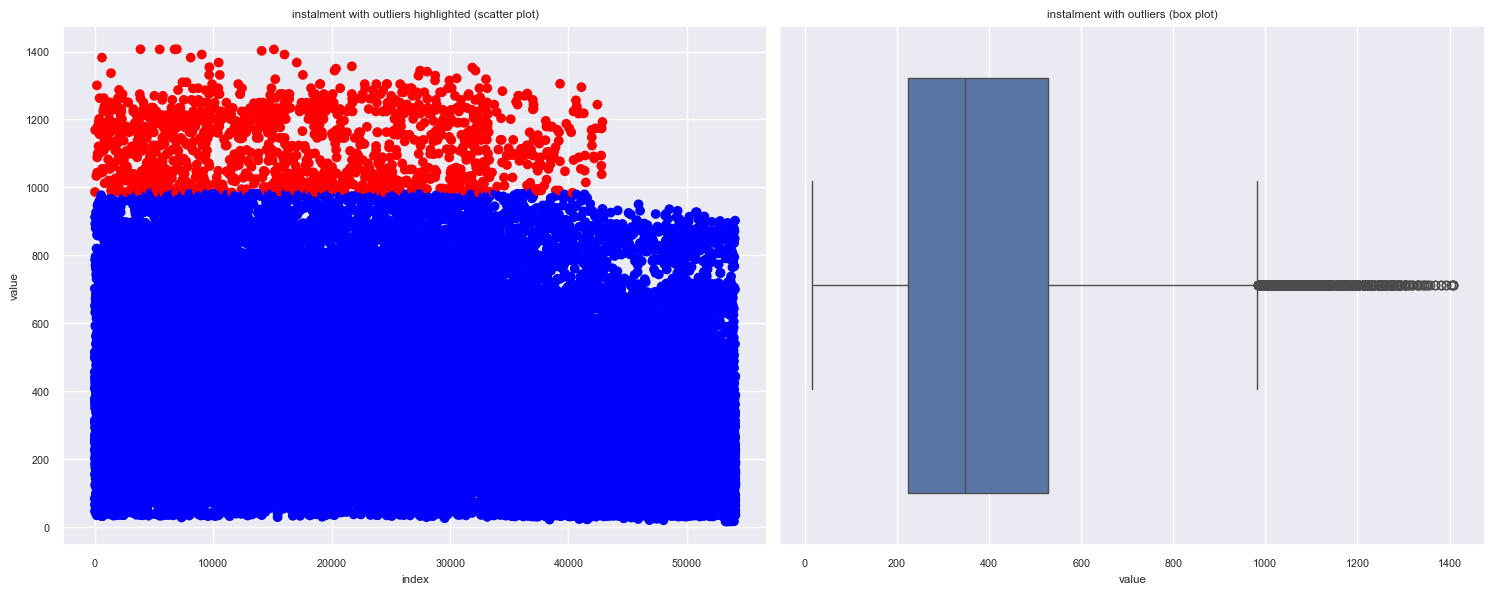

In [82]:
column = 'instalment'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_skew_corrected, column)
df_visuals.outliers_visuals(loan_payments_df_skew_corrected, column, outliers)
plt.show()

Observations: 'instalment' looks like it has a large number of outliers above the upper bound of the IQR. However, removing all these rows will remove too many rows from the data. Instead we'll just remove the most extreme outliters above the 1300 mark, as they might affect any statistical calculations carried out on the dataset at a later stage. 

Updated IQR and Outliers for: instalment
Q1 (25th percentile): 224.52
Q3 (75th percentile): 527.36
IQR: 302.84000000000003


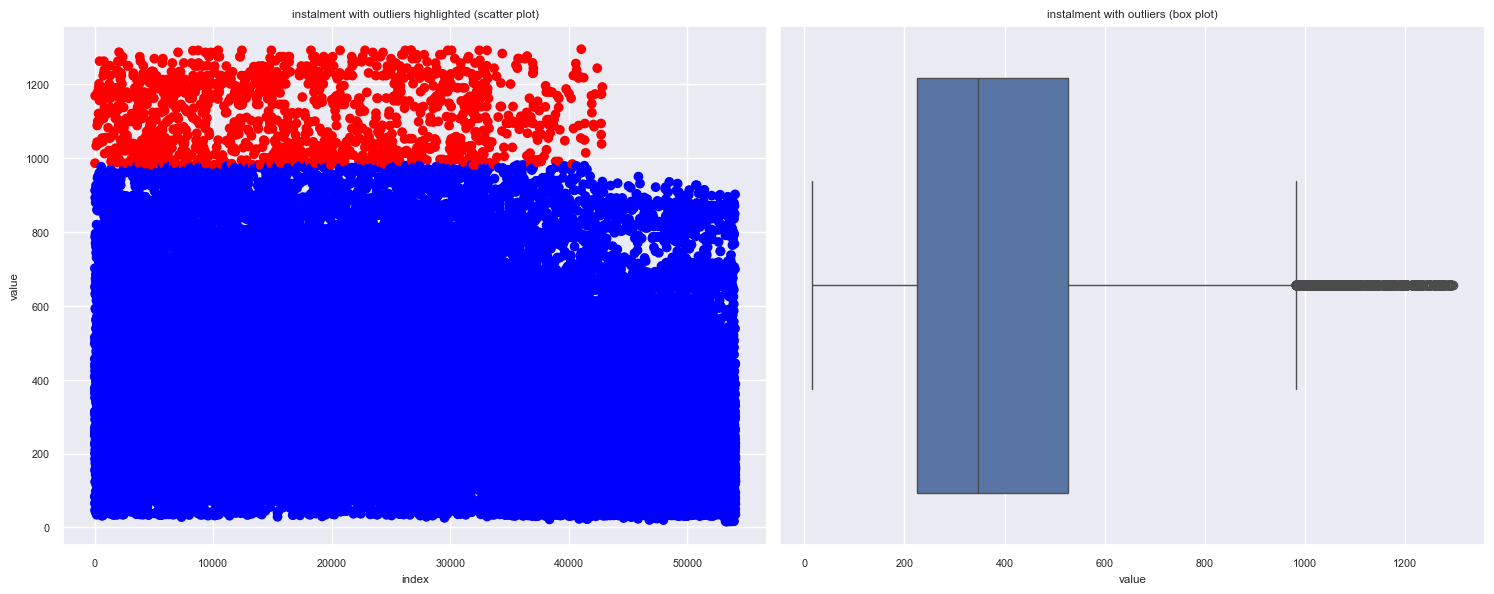

In [83]:
# Remove upper outliers.
loan_payments_df_remove_outliers = df_transforms.remove_upper_outliers(loan_payments_df_skew_corrected, 'instalment', 1300)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'annual_inc'

IQR and Outliers for: annual_inc
Q1 (25th percentile): 10.714417768752456
Q3 (75th percentile): 11.362102575235644
IQR: 0.6476848064831877


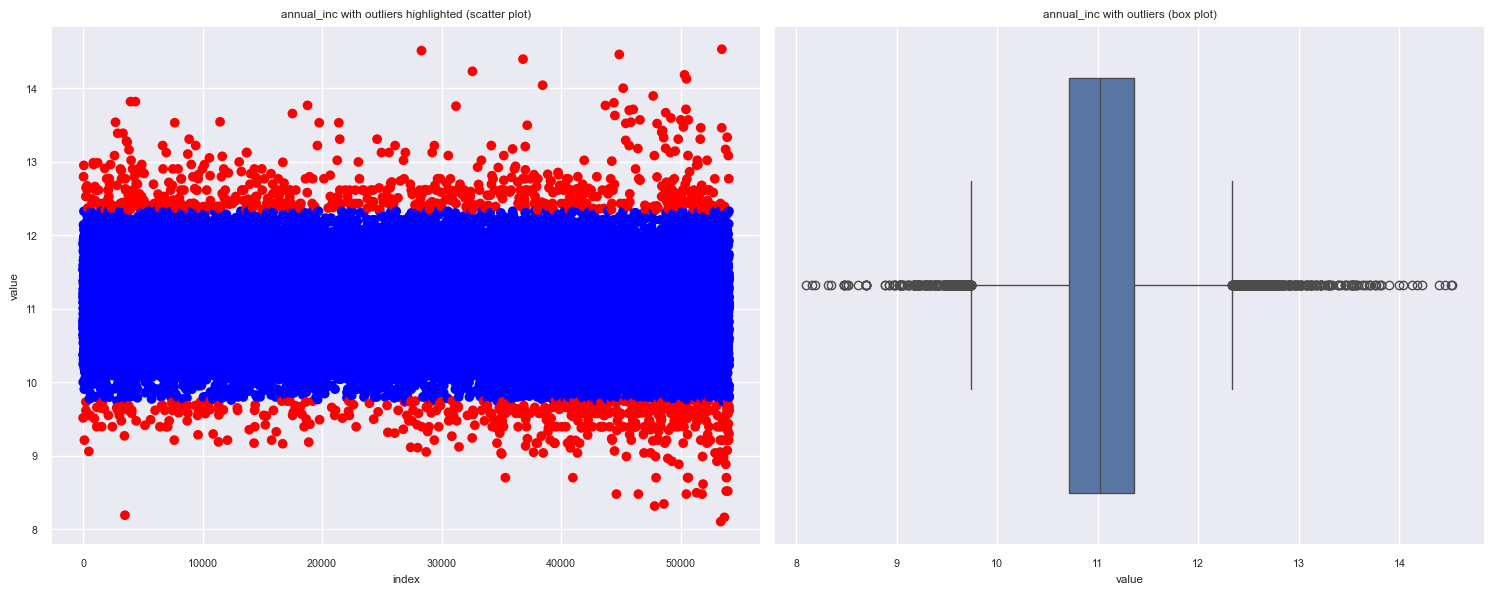

In [84]:
column = 'annual_inc'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: 'annual_inc' has several extreme outliers above 13.5 and below 9. We will remove those.

Updated IQR and Outliers for: annual_inc
Q1 (25th percentile): 10.714417768752456
Q3 (75th percentile): 11.362102575235644
IQR: 0.6476848064831877


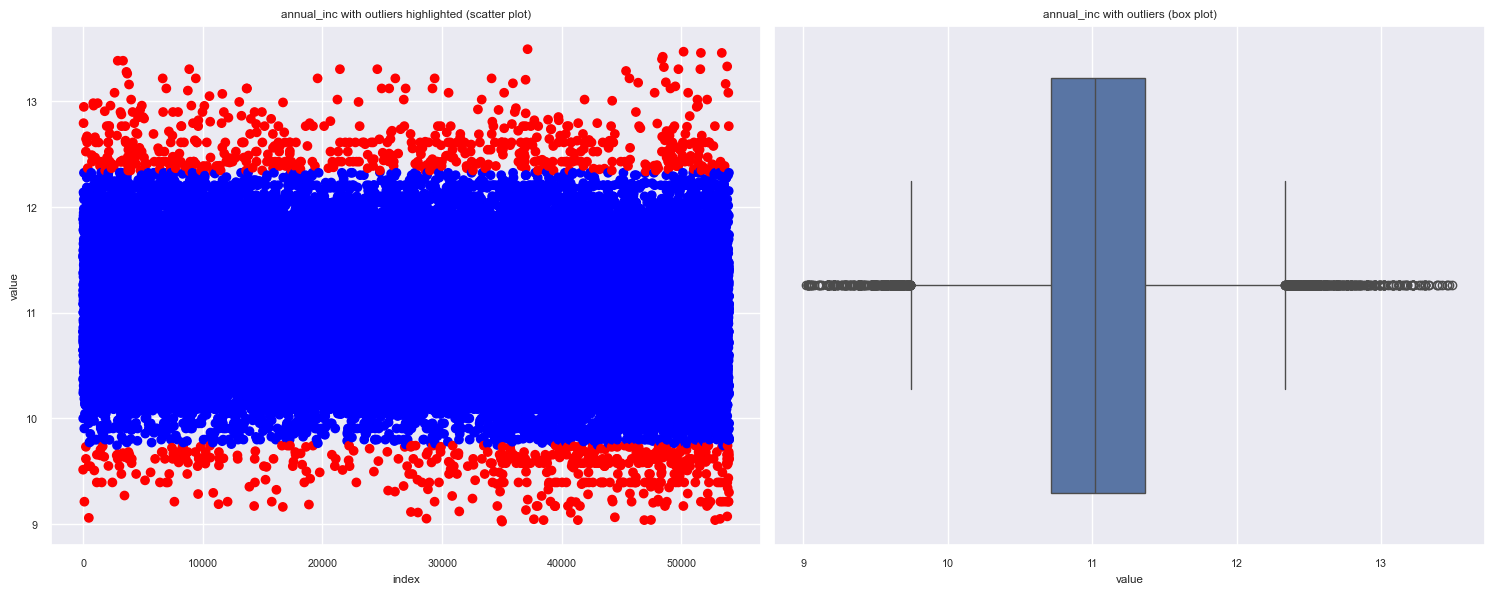

In [85]:
# Remove outliers.
loan_payments_df_remove_outliers = df_transforms.remove_upper_outliers(loan_payments_df_remove_outliers, 'annual_inc', 13.5)
loan_payments_df_remove_outliers = df_transforms.remove_lower_outliers(loan_payments_df_remove_outliers, 'annual_inc', 9)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'open_accounts'

IQR and Outliers for: open_accounts
Q1 (25th percentile): 1.9459101490553132
Q3 (75th percentile): 2.5649493574615367
IQR: 0.6190392084062235


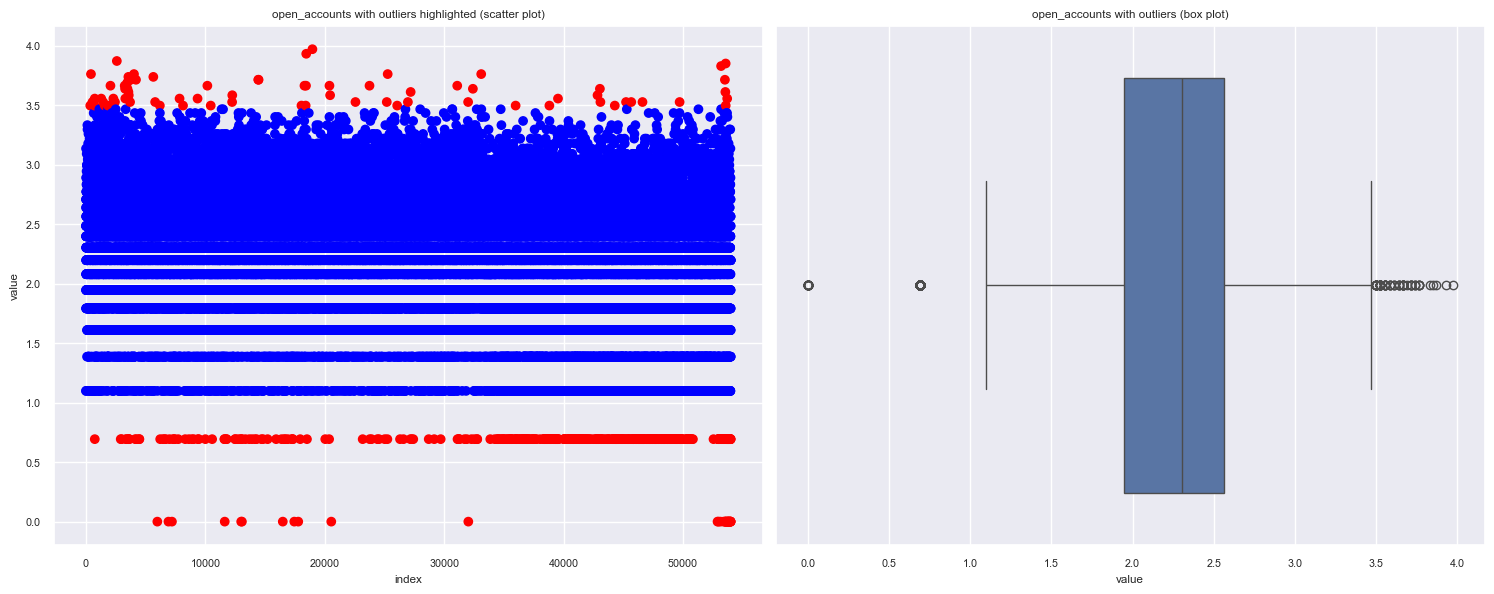

In [86]:
column = 'open_accounts'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: 'open_accounts' has a handful of outliers above the upper bound of the IQR which we can remove. There are also serveral outliers below the lower bound of the IQR but I suggest we just remove the rows with zero value, as removing all the values at approx 0.7 as well will impact the dataset too much. 



Updated IQR and Outliers for: open_accounts
Q1 (25th percentile): 1.9459101490553132
Q3 (75th percentile): 2.5649493574615367
IQR: 0.6190392084062235


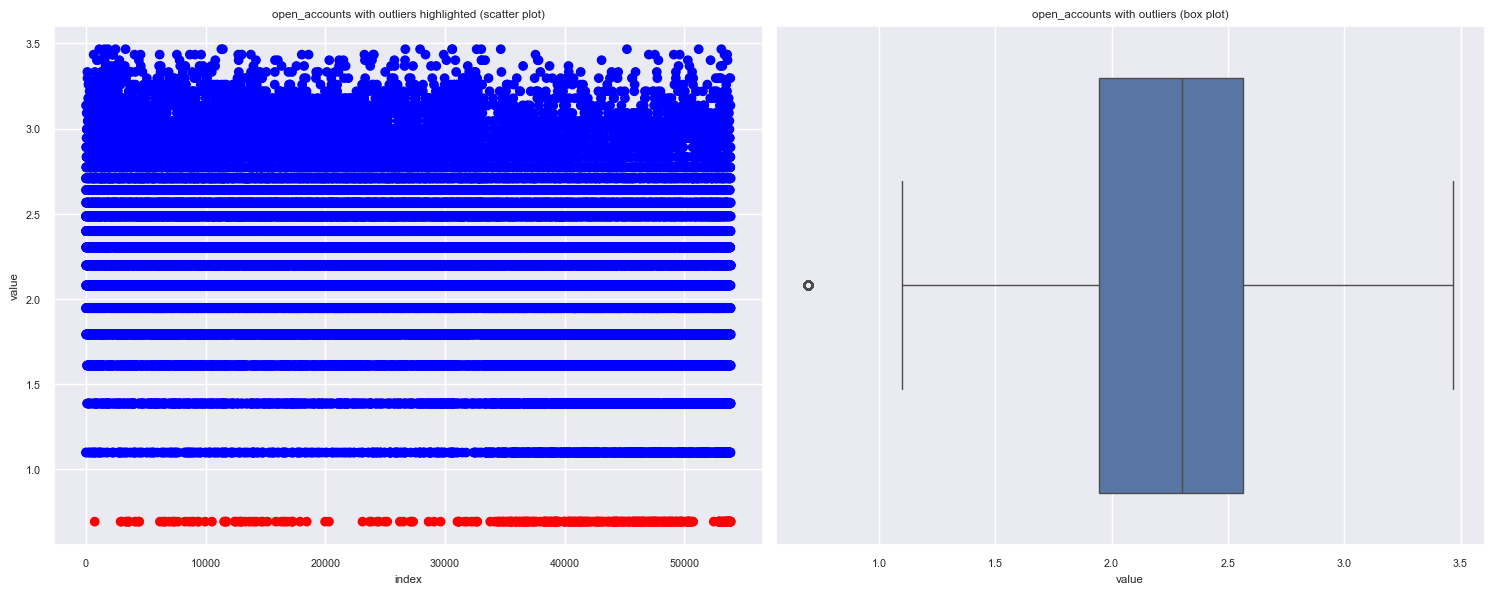

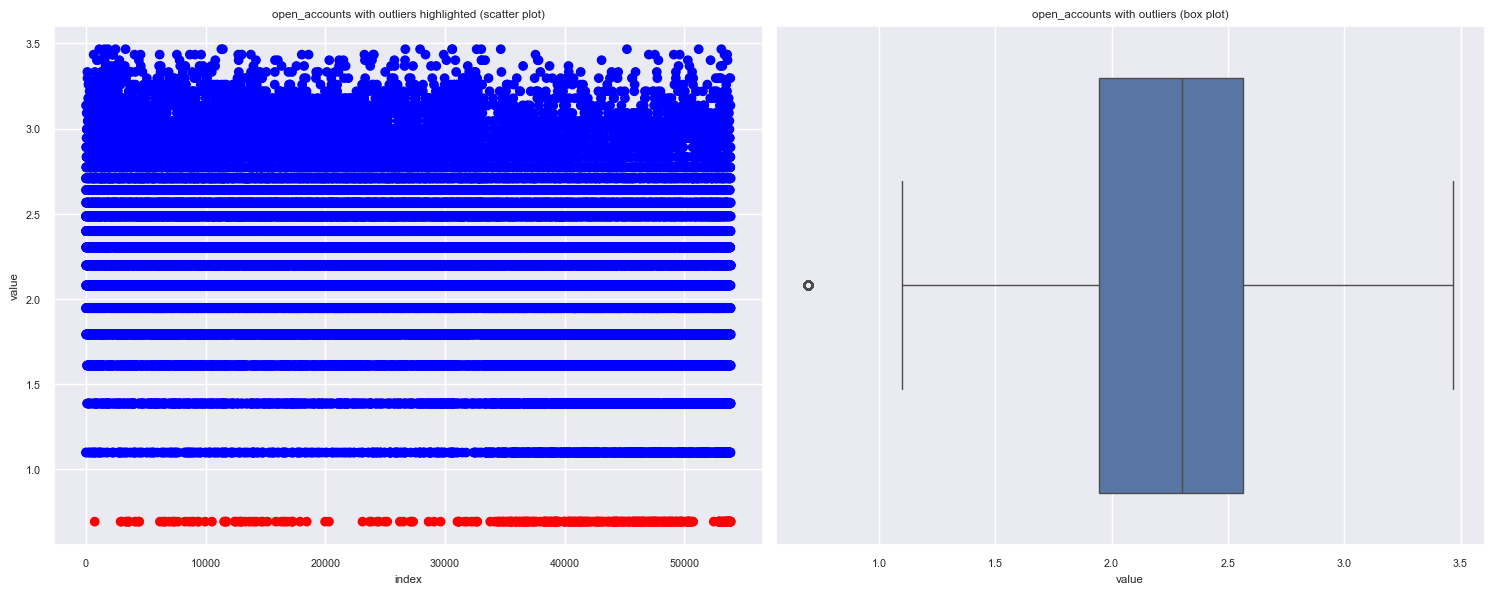

In [ ]:
# Remove outliers.
open_accounts_upper_bound = info_methods.upper_bound(loan_payments_df_remove_outliers, 'open_accounts')
loan_payments_df_remove_outliers = df_transforms.remove_upper_outliers(loan_payments_df_remove_outliers, 'open_accounts', open_accounts_upper_bound)
loan_payments_df_remove_outliers = df_transforms.remove_lower_outliers(loan_payments_df_remove_outliers, 'open_accounts', 0.01)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'total_accounts'

IQR and Outliers for: total_accounts
Q1 (25th percentile): 16.0
Q3 (75th percentile): 31.0
IQR: 15.0


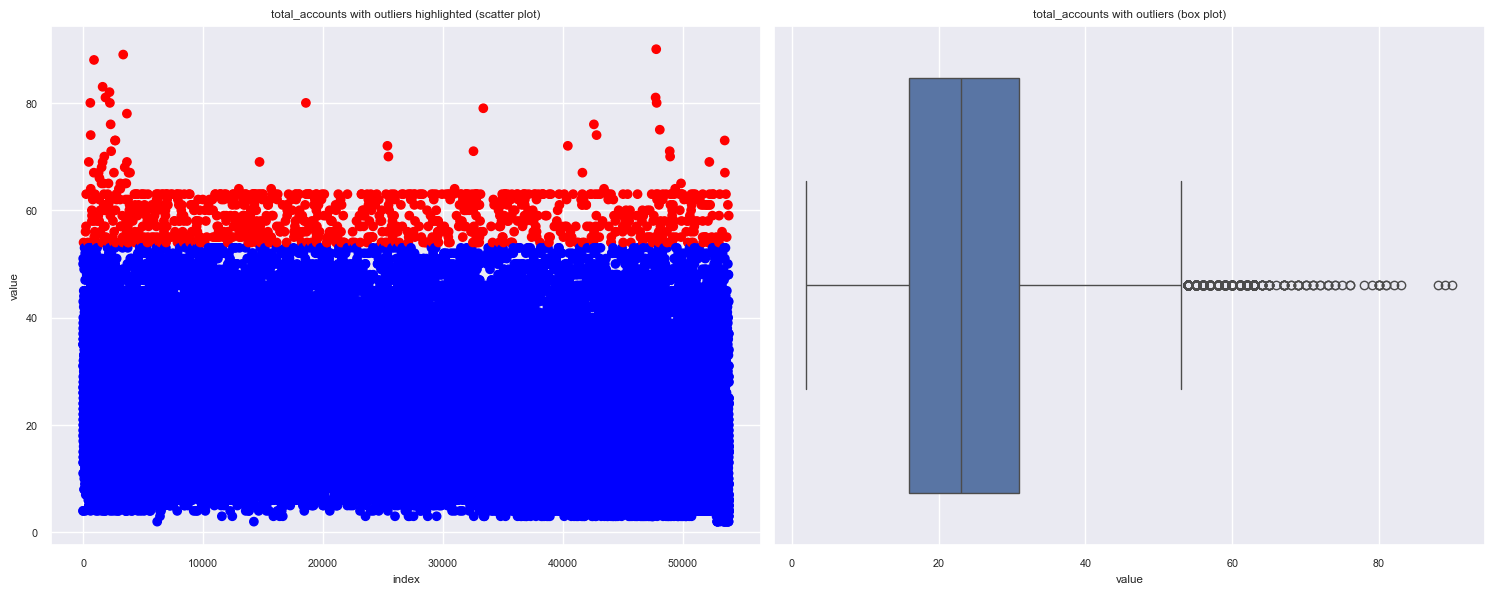

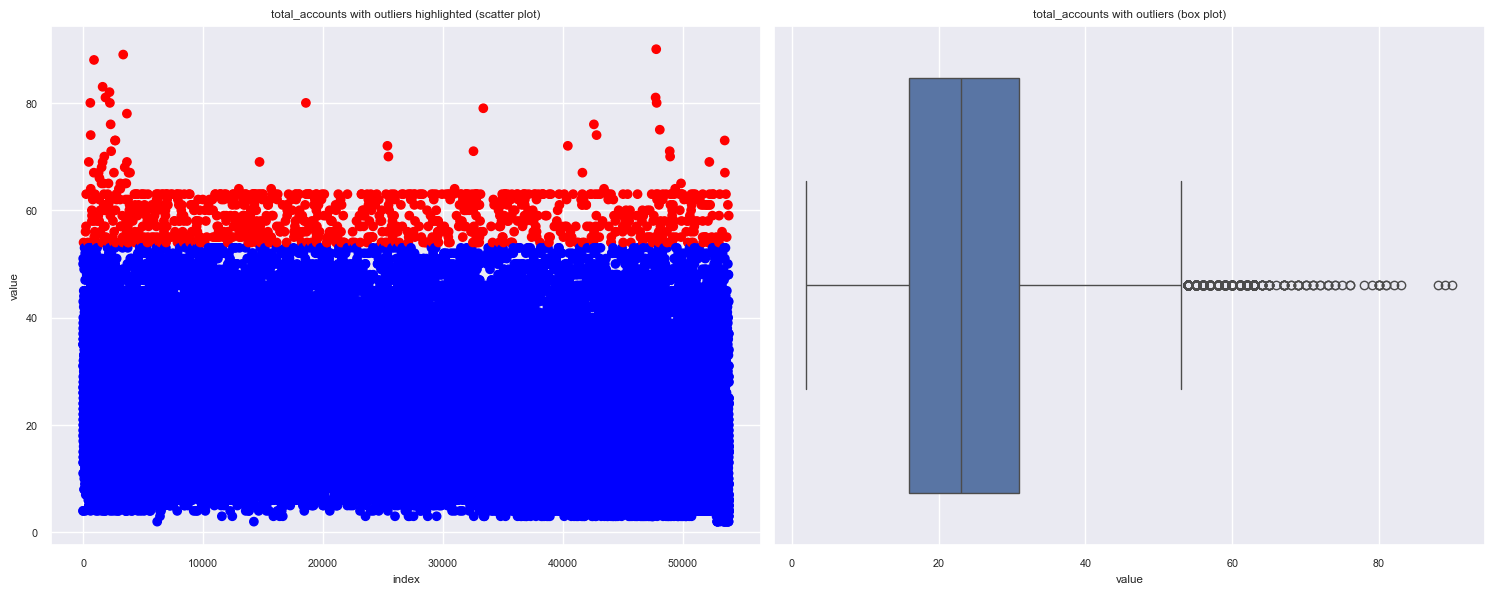

In [ ]:
column = 'total_accounts'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: 'total_accounts' has a handful of extreme outliers above 63. Let's remove those.



Updated IQR and Outliers for: total_accounts
Q1 (25th percentile): 16.0
Q3 (75th percentile): 31.0
IQR: 15.0


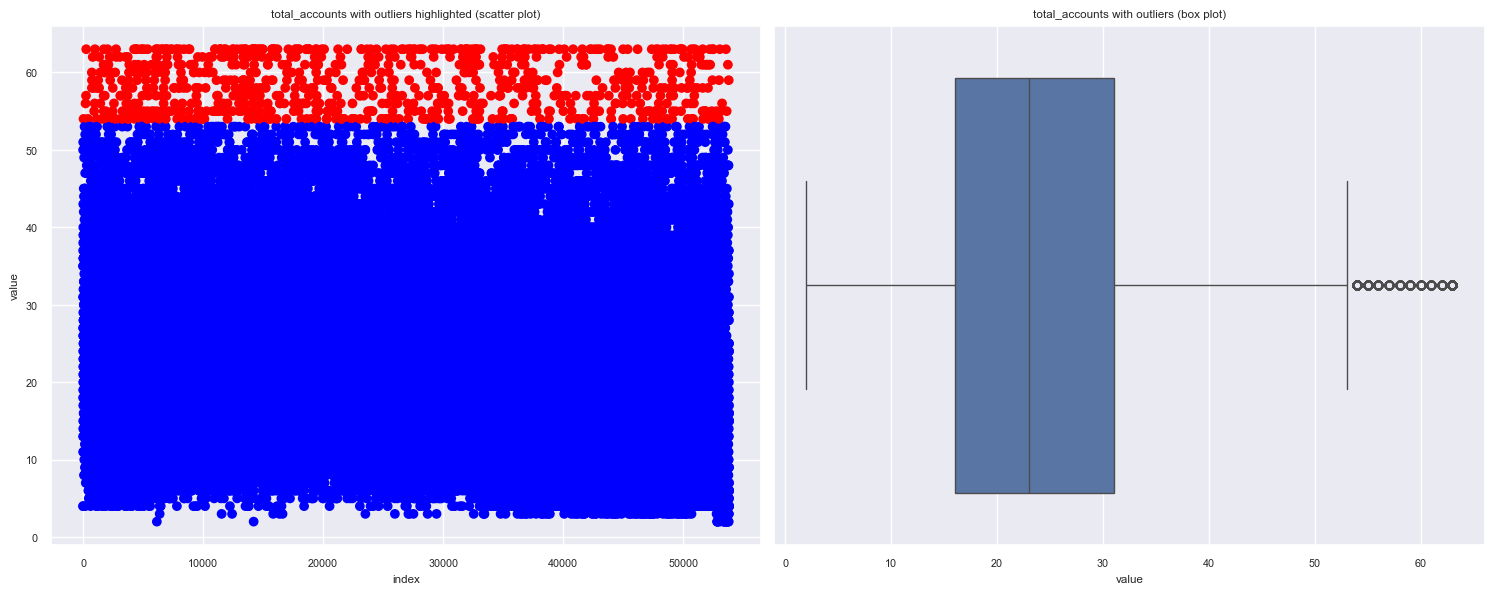

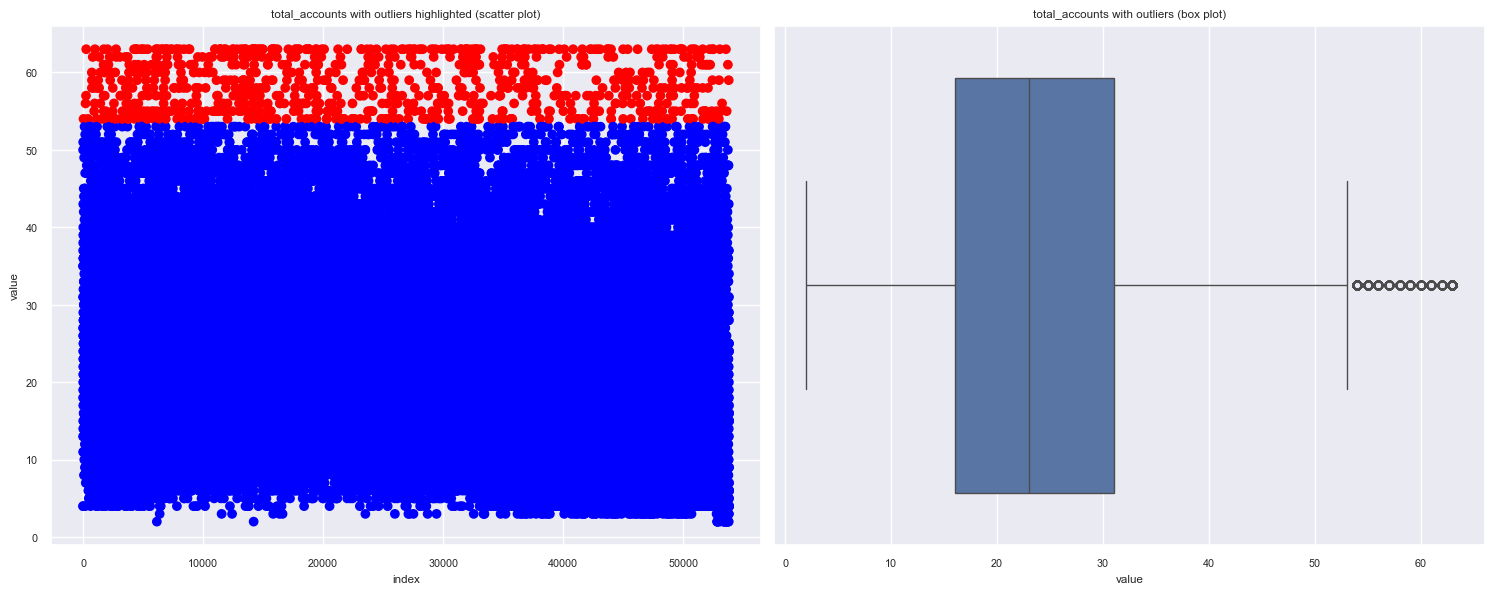

In [ ]:
# Remove outliers.
loan_payments_df_remove_outliers = df_transforms.remove_upper_outliers(loan_payments_df_remove_outliers, 'total_accounts', 63)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'total_payment'

IQR and Outliers for: total_payment
Q1 (25th percentile): 41.36588259819489
Q3 (75th percentile): 57.08143107745485
IQR: 15.715548479259965


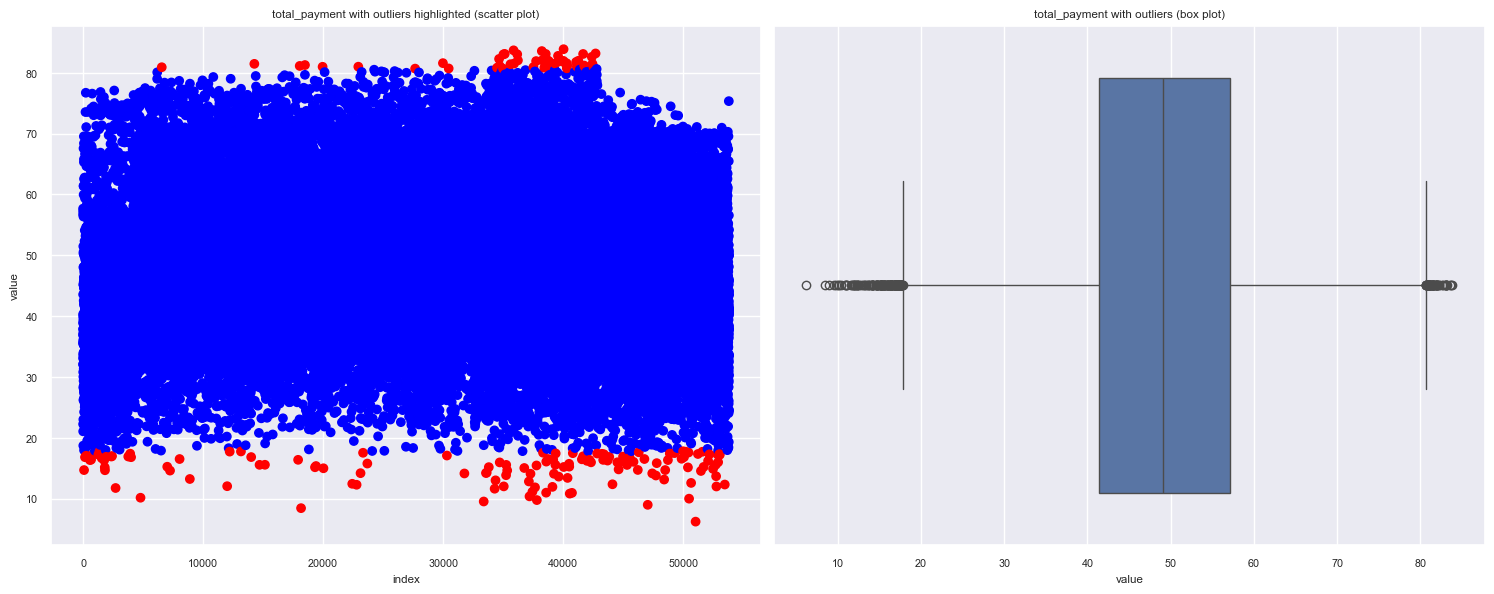

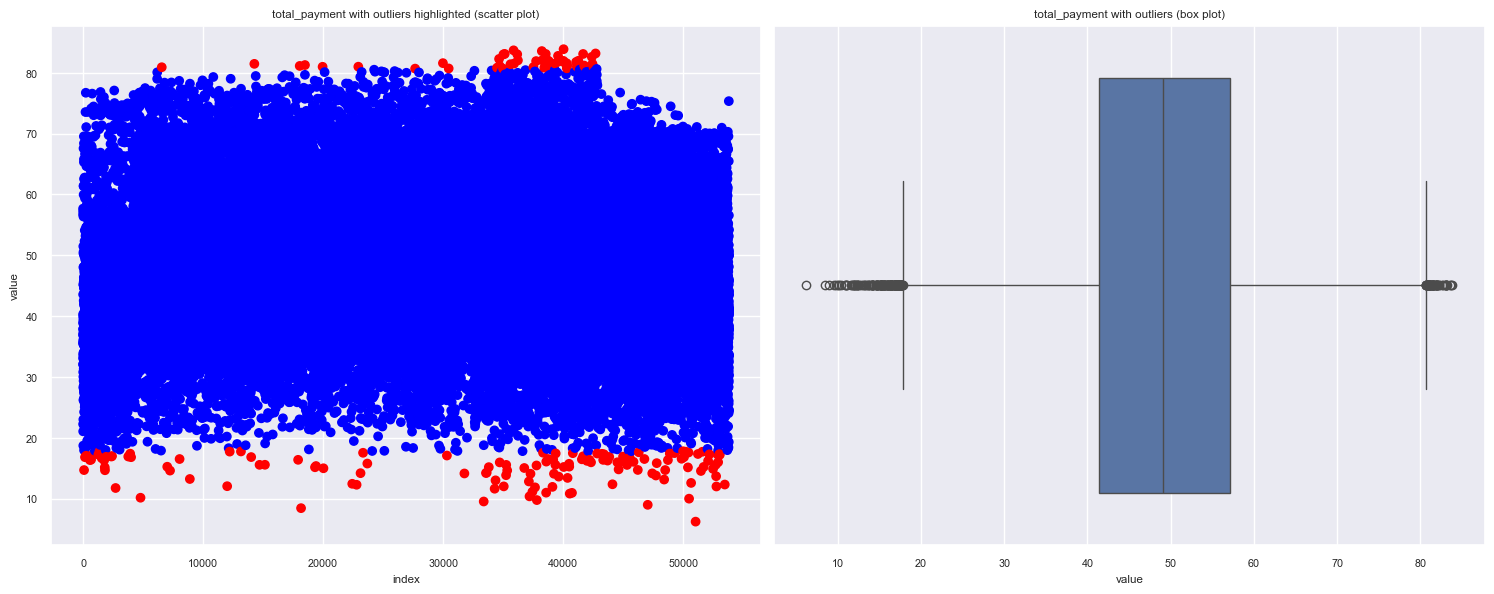

In [ ]:
column = 'total_payment'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: 'total_payment' has a small number of values above and below the IQR, so lets remove those rows.



Updated IQR and Outliers for: total_payment
Q1 (25th percentile): 41.428761765033045
Q3 (75th percentile): 57.07977060320613
IQR: 15.651008838173084


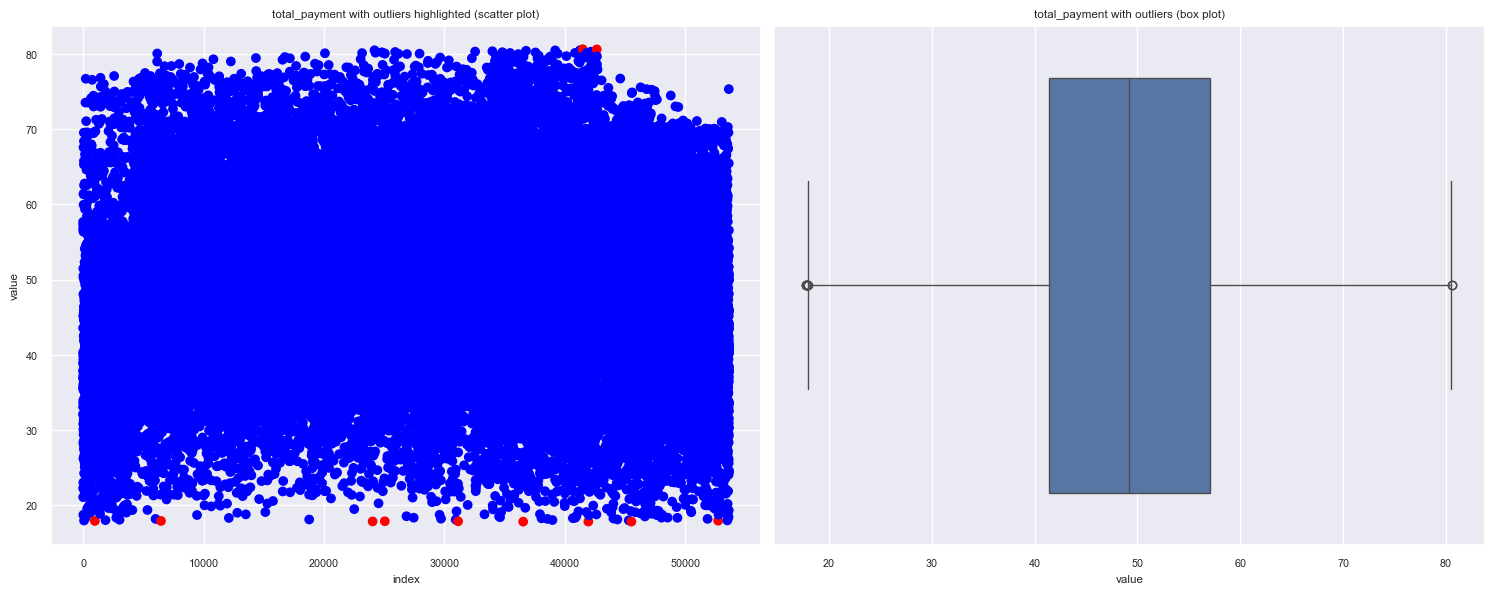

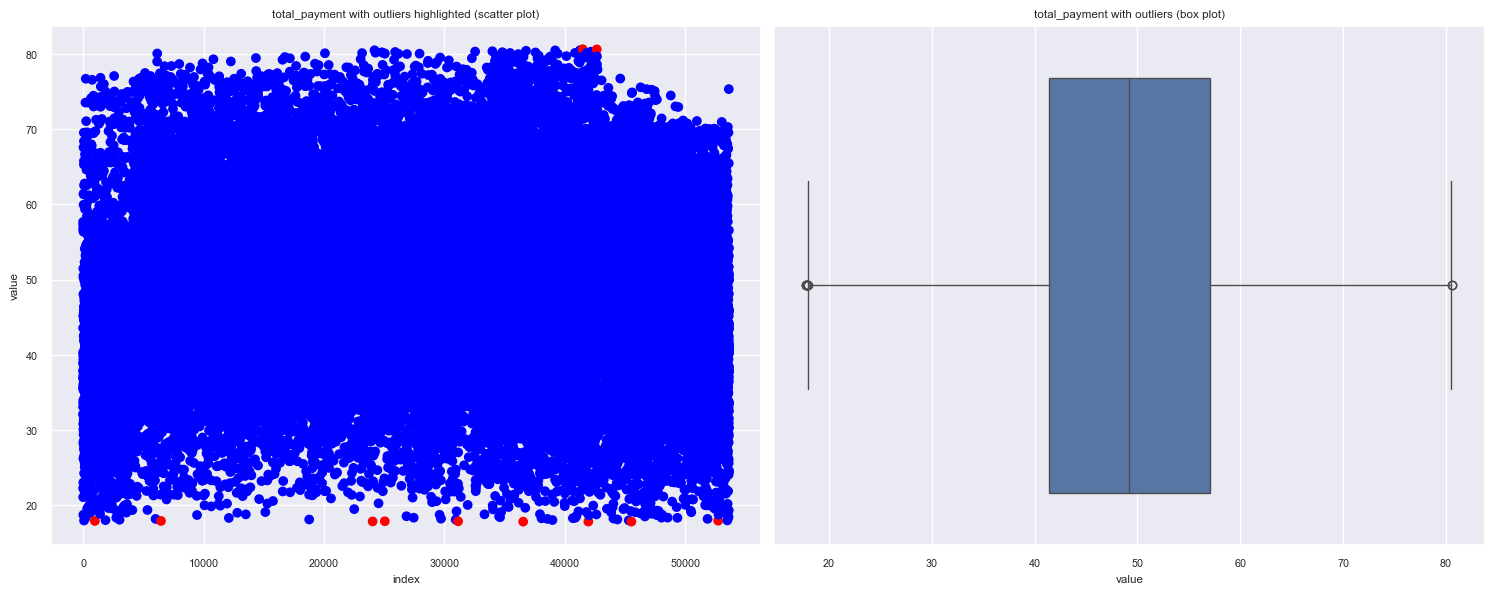

In [ ]:
# Remove outliers.
total_payment_lower_bound = info_methods.lower_bound(loan_payments_df_remove_outliers, 'total_payment')
total_payment_upper_bound = info_methods.upper_bound(loan_payments_df_remove_outliers, 'total_payment')
loan_payments_df_remove_outliers = df_transforms.remove_lower_outliers(loan_payments_df_remove_outliers, 'total_payment', total_payment_lower_bound)
loan_payments_df_remove_outliers = df_transforms.remove_upper_outliers(loan_payments_df_remove_outliers, 'total_payment', total_payment_upper_bound)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'total_rec_prncp'

IQR and Outliers for: total_rec_prncp
Q1 (25th percentile): 39.48434799716882
Q3 (75th percentile): 56.052217129969044
IQR: 16.567869132800226


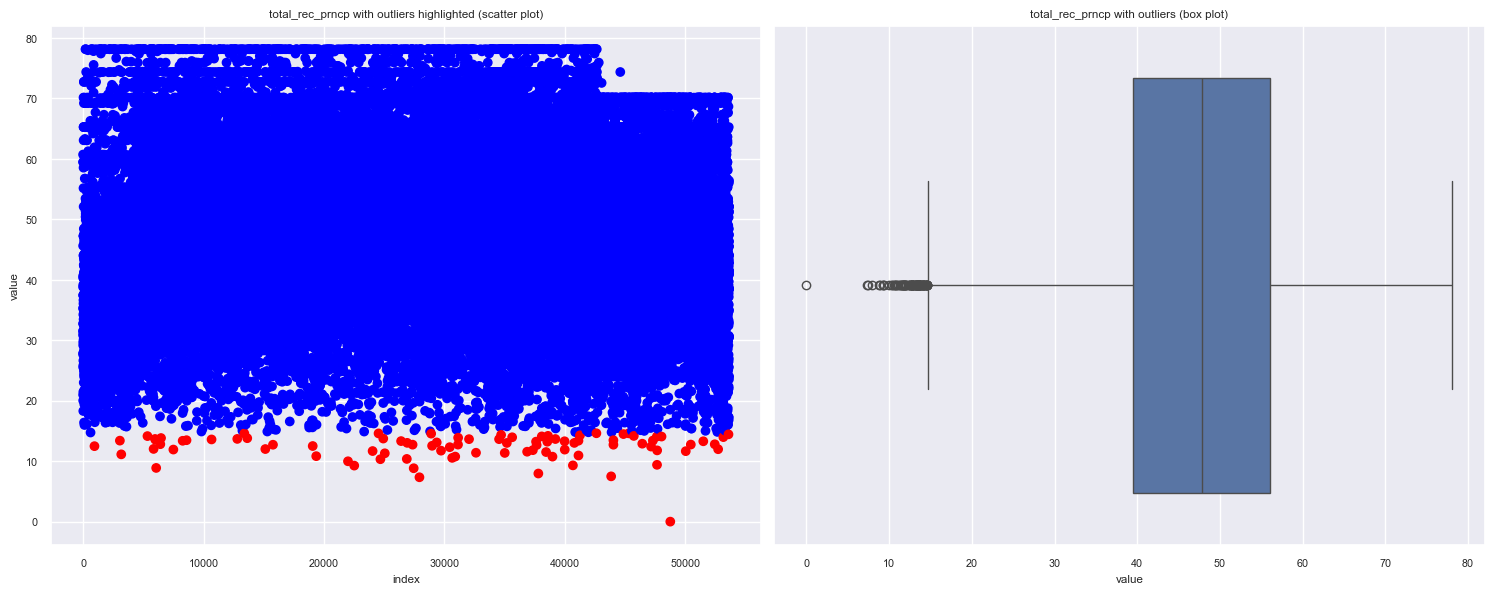

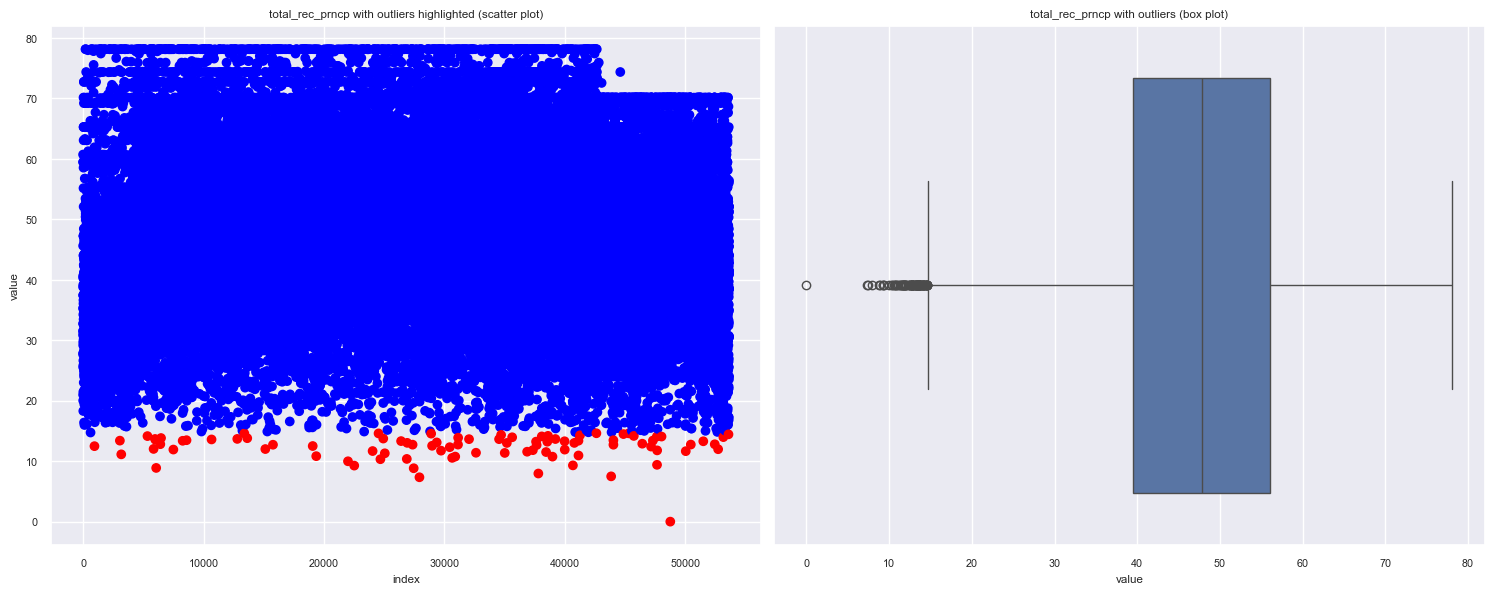

In [ ]:
column = 'total_rec_prncp'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: 'total_rec_prncp' has some values below the lower bound of the IQR. So let's remove those as well.


Updated IQR and Outliers for: total_rec_prncp
Q1 (25th percentile): 39.54250139552085
Q3 (75th percentile): 56.12497862562528
IQR: 16.58247723010443


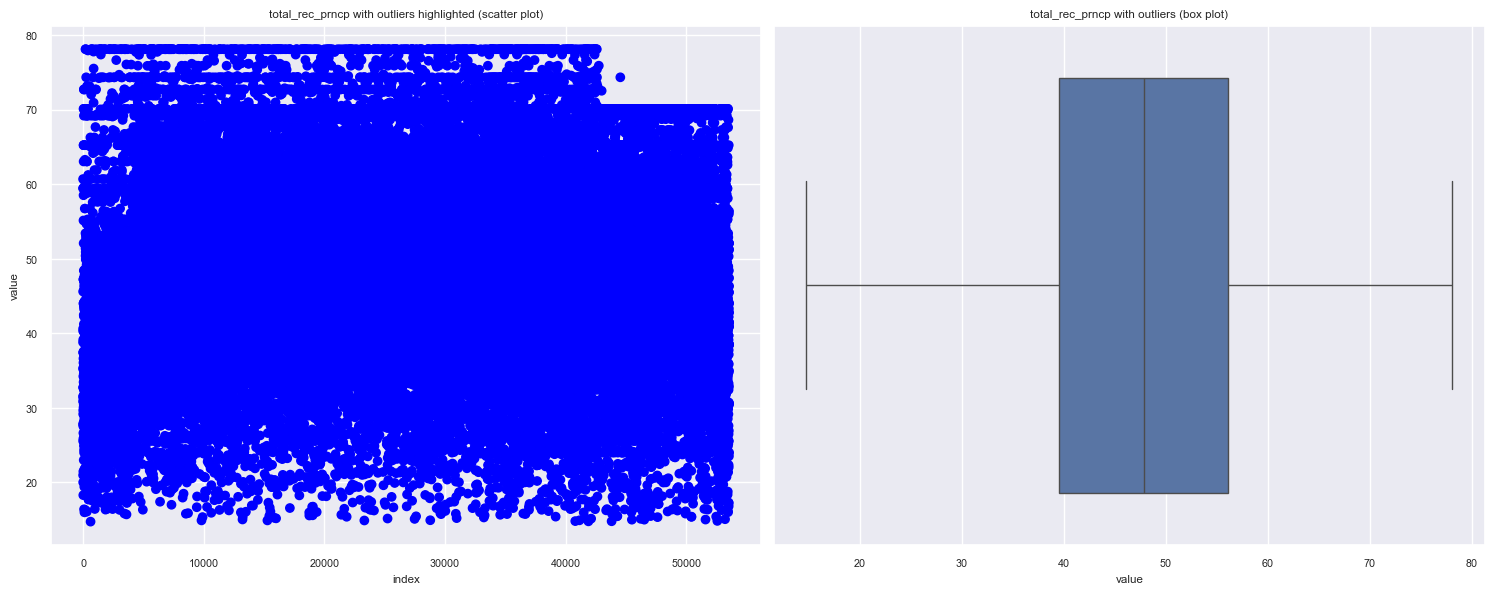

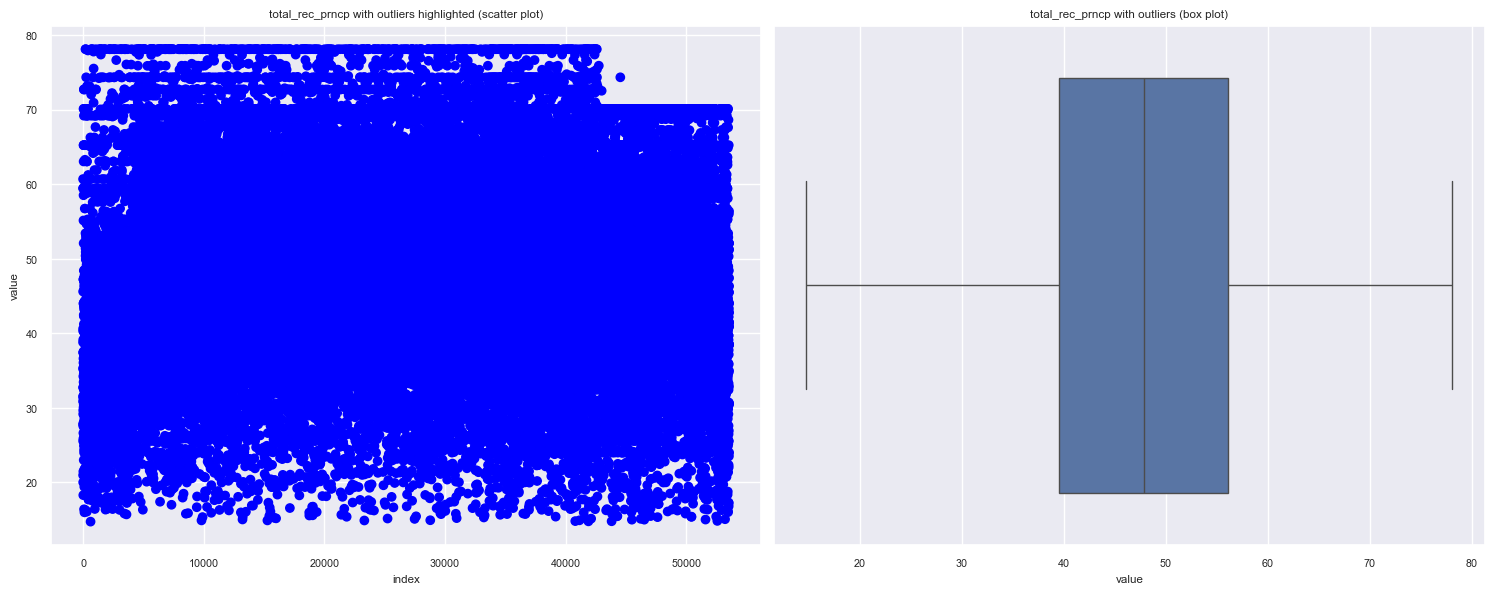

In [ ]:
# Remove outliers. 
total_rec_prncp_lower_bound = info_methods.lower_bound(loan_payments_df_remove_outliers, 'total_rec_prncp')
loan_payments_df_remove_outliers = df_transforms.remove_lower_outliers(loan_payments_df_remove_outliers, 'total_rec_prncp', total_rec_prncp_lower_bound)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

'total_rec_int'

IQR and Outliers for: total_rec_int
Q1 (25th percentile): 6.803691144869184
Q3 (75th percentile): 8.110263511342557
IQR: 1.3065723664733735


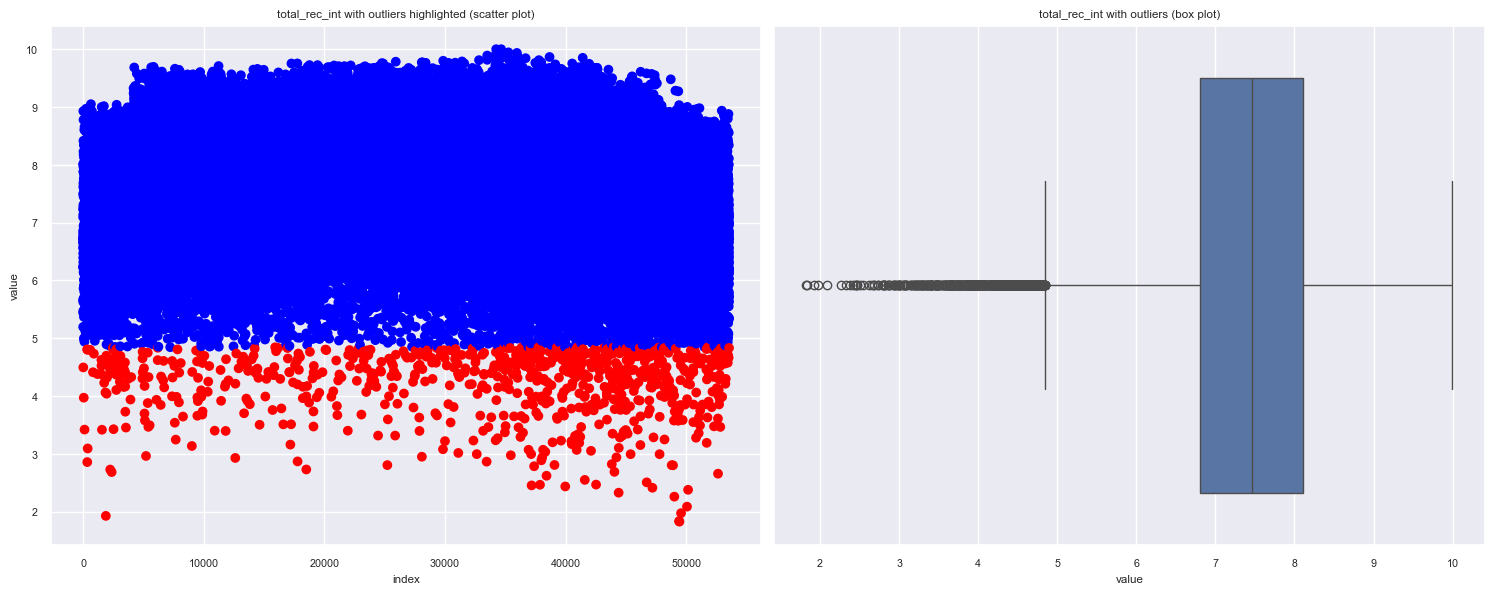

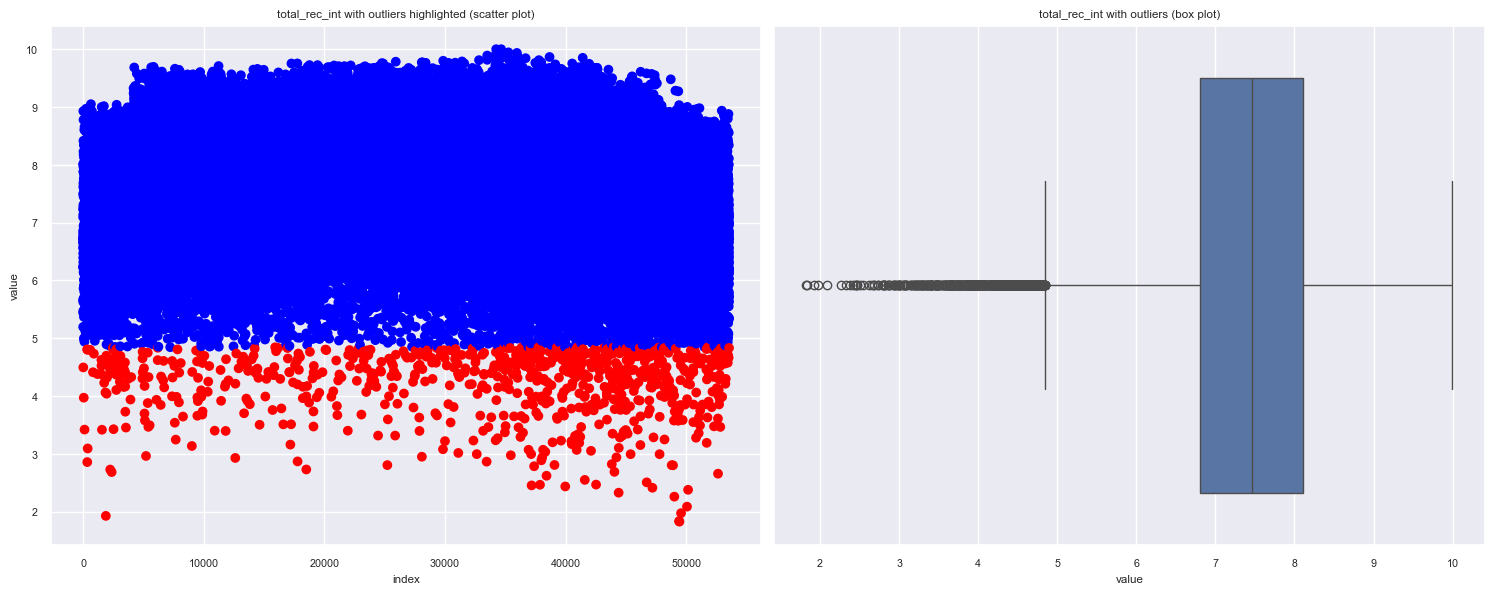

In [ ]:
column = 'total_rec_int'
print(f'IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)
plt.show()

Observations: As there are a large amount of values below the lower bound mark for 'total_rec_int', I would suggest removing only the smallest values from the value '4' and below. Any more and we would end up removing too many rows from the dataset. 

Updated IQR and Outliers for: total_rec_int
Q1 (25th percentile): 6.8133951473613195
Q3 (75th percentile): 8.114634355680101
IQR: 1.3012392083187816


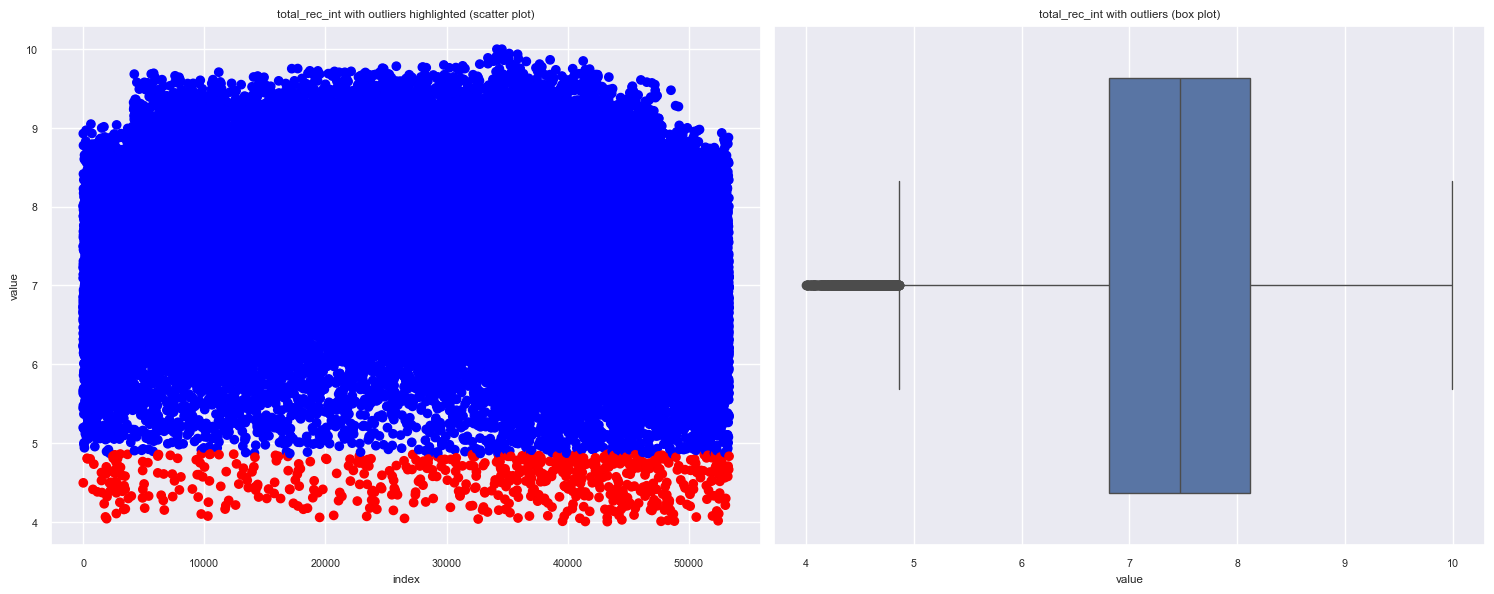

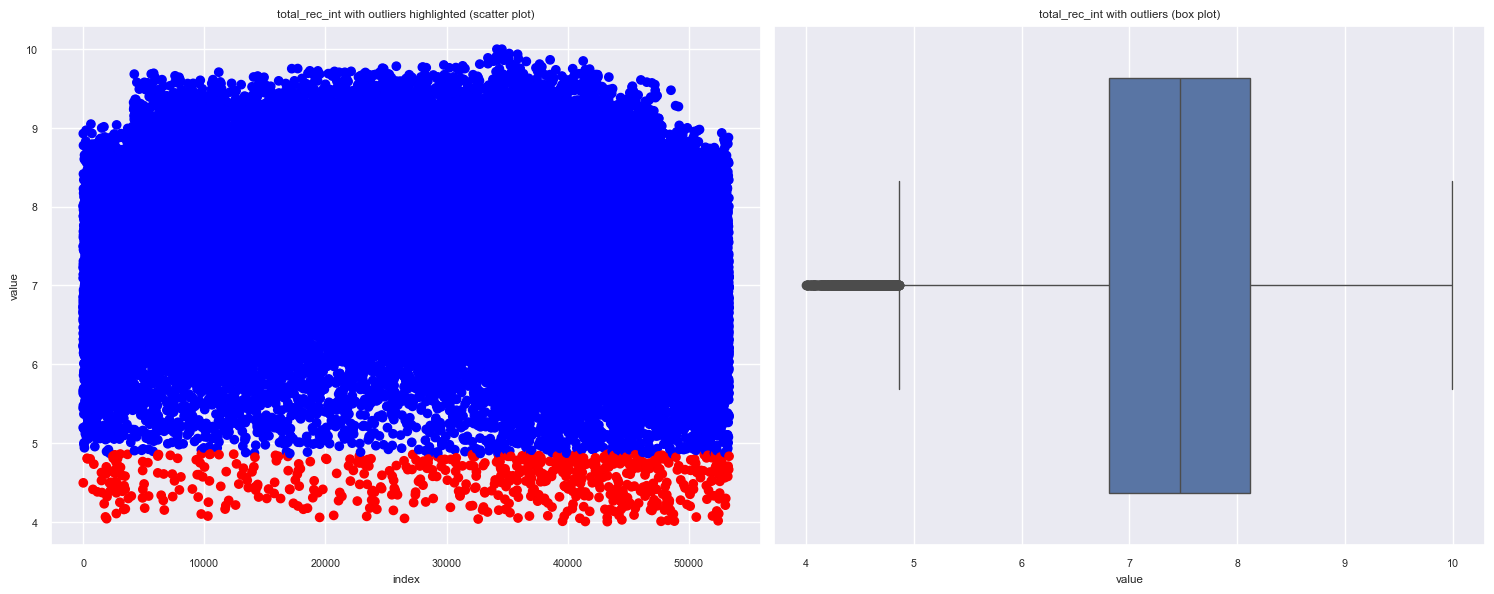

In [95]:
# Remove outliers.
loan_payments_df_remove_outliers = df_transforms.remove_lower_outliers(loan_payments_df_remove_outliers, 'total_rec_int', 4)

# Re-check plots.
print(f'Updated IQR and Outliers for: {column}')
outliers = info_methods.measure_iqr(loan_payments_df_remove_outliers, column)
df_visuals.outliers_visuals(loan_payments_df_remove_outliers, column, outliers)

#### Correlation

Checking the correlation between each column. Identify any higly correlated columns and remove them. 

<Axes: >

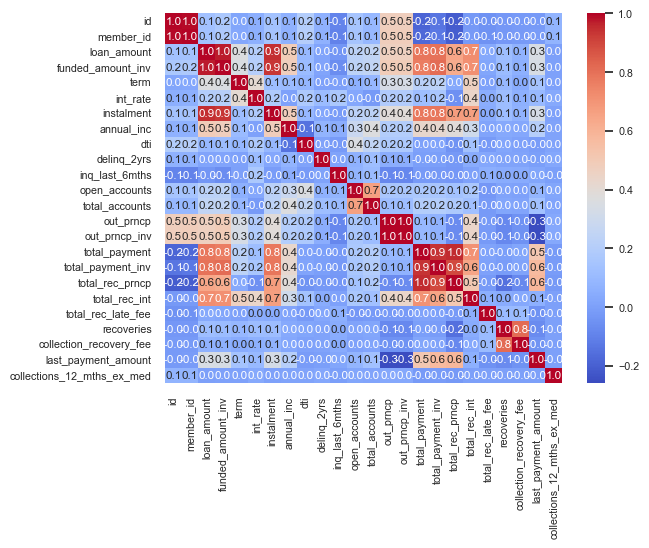

In [96]:
# Apply a heatmap to the dataset columns to visualise correlation. 
df_visuals.df_heatmap(loan_payments_df_remove_outliers)

This confirms from our previous explorations into skew that the following variables are highly correlated:
1. loan_amount and funded_amount_inv (are in fact identical with a correlation of 1.0)
2. total_payment, total_payment_inv and total_rec_prncp 
3. out_prncp and out_prncp_inv.

In addition, instalment and loan_amount appear to be highly correlated as well, with a result of 0.9.

A handful of other variable relationships have correlation values of 0.8, but if we use 0.9 as guideline as acceptable correlation we can ignore those for now.

So to confirm, we will drop the following rows as they are highly correlated:
    'funded_amount_inv'
    'total_payment_inv'
    'total_rec_prncp'
    'out_prncp_inv'


In [97]:
# Dropping correlated columns.
drop_these_columns_2 = ['funded_amount_inv', 'total_payment_inv', 'total_rec_prncp', 'out_prncp_inv']
for r in drop_these_columns_2:
    loan_payments_df_final_eda = df_transforms.drop_columns(loan_payments_df_remove_outliers, r)

#### Final Check of the Dataset

Confirming the final number of rows, columns and column datatypes, as well as the descriptive statistics of the dataset. 

In [98]:
# Display the shape of the dataset.    
info_methods.df_info(loan_payments_df_final_eda)  
info_methods.describe_df(loan_payments_df_final_eda)  

<class 'pandas.core.frame.DataFrame'>
Index: 53319 entries, 0 to 54227
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          53319 non-null  int64         
 1   member_id                   53319 non-null  int64         
 2   loan_amount                 53319 non-null  int64         
 3   term                        53319 non-null  float64       
 4   int_rate                    53319 non-null  float64       
 5   instalment                  53319 non-null  float64       
 6   grade                       53319 non-null  category      
 7   sub_grade                   53319 non-null  category      
 8   employment_length           53319 non-null  category      
 9   home_ownership              53319 non-null  category      
 10  annual_inc                  53319 non-null  float64       
 11  verification_status         53319 non-null  category      
